In [8]:
#Install all necessary packages
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install tensorflow
!pip install seaborn

In [116]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
#Load Dataset
Dataset1 = pd.read_csv('Obfuscated-MalMem2022.csv')
Dataset2 = pd.read_csv('MalwareMemoryDump.csv')

In [119]:
Dataset1.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [122]:
Dataset1.shape

(58596, 57)

In [124]:
Dataset2.shape

(58596, 58)

In [126]:
Dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
pslist.nproc,58596.0,41.394771,5.777249,21.000000,40.000000,41.000000,43.000000,2.400000e+02
pslist.nppid,58596.0,14.713837,2.656748,8.000000,12.000000,15.000000,16.000000,7.200000e+01
pslist.avg_threads,58596.0,11.341655,1.588231,1.650000,9.972973,11.000000,12.861955,1.681818e+01
pslist.nprocs64bit,58596.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
pslist.avg_handlers,58596.0,247.509819,111.857790,34.962500,208.725000,243.963710,289.974322,2.484595e+04
dlllist.ndlls,58596.0,1810.805447,329.782639,670.000000,1556.000000,1735.000000,2087.000000,3.443000e+03
dlllist.avg_dlls_per_proc,58596.0,43.707806,5.742023,7.333333,38.833333,42.781524,49.605280,5.317073e+01
handles.nhandles,58596.0,10258.584221,4866.864130,3514.000000,8393.000000,9287.500000,12193.000000,1.047310e+06
handles.avg_handles_per_proc,58596.0,249.560958,145.999866,71.139241,209.648228,247.208951,291.355050,3.378419e+04
handles.nport,58596.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


In [128]:
Dataset2.describe().T

,count,mean,std,min,25%,50%,75%,max
pslist_nproc,58596.0,41.394771,5.777249,21.000000,40.000000,41.000000,43.000000,2.400000e+02
pslist_nppid,58596.0,14.713837,2.656748,8.000000,12.000000,15.000000,16.000000,7.200000e+01
pslist_avg_threads,58596.0,11.341655,1.588231,1.650000,9.972973,11.000000,12.861955,1.681818e+01
pslist_nprocs64bit,58596.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
pslist_avg_handlers,58596.0,247.509819,111.857790,34.962500,208.725000,243.963710,289.974322,2.484595e+04
dlllist_ndlls,58596.0,1810.805447,329.782639,670.000000,1556.000000,1735.000000,2087.000000,3.443000e+03
dlllist_avg_dlls_per_proc,58596.0,43.707806,5.742023,7.333333,38.833333,42.781524,49.605280,5.317073e+01
handles_nhandles,58596.0,10258.584221,4866.864130,3514.000000,8393.000000,9287.500000,12193.000000,1.047310e+06
handles_avg_handles_per_proc,58596.0,249.560958,145.999866,71.139241,209.648228,247.208951,291.355050,3.378419e+04
handles_nport,58596.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


In [130]:
legit_dataset1 = Dataset1[0:41323].drop(["Class"], axis=1)
mal1= Dataset1[41323::].drop(["Class"], axis=1)
print("The shape of the legit_dataset1 is: %s samples, %s features"%(legit_dataset1.shape[0],legit_dataset1.shape[1]))
print("The shape of the mal1 dataset is: %s samples, %s features"%(mal1.shape[0],mal1.shape[1]))

legit_dataset2 = Dataset2[0:41323].drop(["Label"], axis=1)
mal1= Dataset2[41323::].drop(["Label"], axis=1)
print("The shape of the legit_dataset2 is: %s samples, %s features"%(legit_dataset2.shape[0],legit_dataset2.shape[1]))
print("The shape of the mal1 dataset is: %s samples, %s features"%(mal1.shape[0],mal1.shape[1]))

The shape of the legit_dataset1 is: 41323 samples, 56 features
The shape of the mal1 dataset is: 17273 samples, 56 features
The shape of the legit_dataset2 is: 41323 samples, 57 features
The shape of the mal1 dataset is: 17273 samples, 57 features


In [132]:
print(f'For Dataset1: {Dataset1.value_counts(Dataset1['Class'])}')
print(f'For Dataset2: {Dataset1.value_counts(Dataset2['Label'])}')

For Dataset1: Class
Benign     29298
Malware    29298
Name: count, dtype: int64
For Dataset2: Label
Benign     29298
Malware    29298
Name: count, dtype: int64


In [134]:
Dataset2.value_counts(Dataset2['SubType'])

SubType
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64

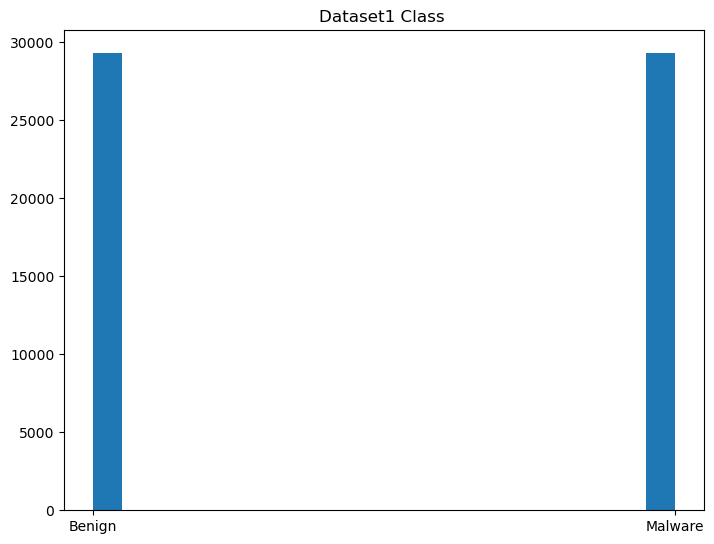

In [136]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(Dataset1['Class'],20)
plt.title("Dataset1 Class ")
plt.show()

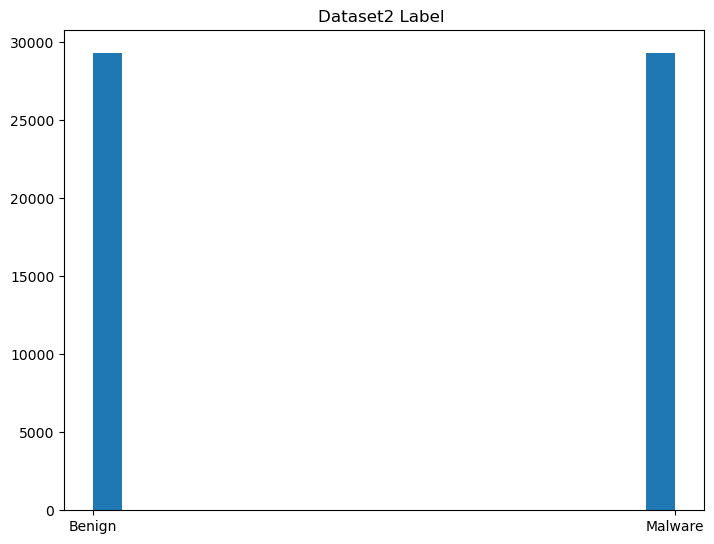

In [138]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(Dataset2['Label'],20)
plt.title("Dataset2 Label ")
plt.show()

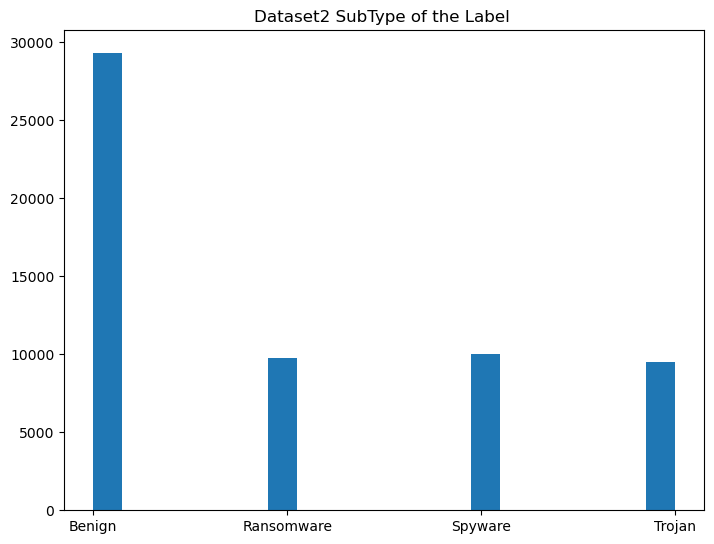

In [140]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(Dataset2['SubType'],20)
plt.title("Dataset2 SubType of the Label ")
plt.show()

In [142]:
data1 = Dataset1.dropna()
print(f'Dataset1: {data1}')

data2 = Dataset2.dropna()
print(f'Dataset2: {data2}')

Dataset1:                                                 Category  pslist.nproc  \
0                                                 Benign            45   
1                                                 Benign            47   
2                                                 Benign            40   
3                                                 Benign            32   
4                                                 Benign            42   
...                                                  ...           ...   
58591  Ransomware-Shade-fa03be3078d1b9840f06745f160eb...            37   
58592  Ransomware-Shade-f56687137caf9a67678cde91e4614...            37   
58593  Ransomware-Shade-faddeea111a25da4d0888f3044ae9...            38   
58594  Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...            37   
58595  Ransomware-Shade-955d9af38346c1755527bd196668e...            38   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0                17           10.55555

In [144]:
#Remove unwanted columns in Dataset1 and Dataset2
try:
    Dataset1 = Dataset1.drop([
                'Category',
                'handles.nport',
                'pslist.nprocs64bit',
                'psxview.not_in_eprocess_pool',
                'psxview.not_in_eprocess_pool_false_avg',
                'svcscan.interactive_process_services',
                'callbacks.nanonymous'
                ],axis=1)
except:
   print("Category, handles.nport, pslist.nprocs64bit, 'psxview.not_in_eprocess_pool, psxview.not_in_eprocess_pool_false_avg, svcscan.interactive_process_services', and callbacks.nanonymous columns already removed")

try: 
    Dataset2 = Dataset2.drop([
                'pslist_nprocs64bit',
                'handles_nport',
                'psxview_not_in_pslist_false_avg',
                'svcscan_interactive_process_services',
                'callbacks_ngeneric',
                'callbacks_nanonymous',
                'Raw_Type',
                'SubType'
                ],axis=1)
except:
    print("pslist_nprocs64bit, handles_nport, psxview_not_in_pslist_false_avg, svcscan_interactive_process_services, callbacks_ngeneric, Raw_Type, and SubType columns already removed")

In [146]:
Dataset1.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,...,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.ngeneric,Class
0,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,3161,...,138,389,221,26,24,116,121,87,8,Benign
1,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,3761,...,138,392,222,26,24,118,122,87,8,Benign
2,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,3996,...,137,395,222,26,27,118,120,88,8,Benign
3,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,2961,...,138,395,222,26,27,118,120,88,8,Benign
4,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,3834,...,138,392,222,26,24,118,124,87,8,Benign


In [148]:
Dataset2.head()

,pslist_nproc,pslist_nppid,pslist_avg_threads,pslist_avg_handlers,dlllist_ndlls,dlllist_avg_dlls_per_proc,handles_nhandles,handles_avg_handles_per_proc,handles_nfile,handles_nevent,...,psxview_not_in_deskthrd_false_avg,modules_nmodules,svcscan_nservices,svcscan_kernel_drivers,svcscan_fs_drivers,svcscan_process_services,svcscan_shared_process_services,svcscan_nactive,callbacks_ncallbacks,Label
0,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,3161,...,0.191489,138,389,221,26,24,116,121,87,Benign
1,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,3761,...,0.127660,138,392,222,26,24,118,122,87,Benign
2,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,3996,...,0.125000,137,395,222,26,27,118,120,88,Benign
3,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,2961,...,0.187500,138,395,222,26,27,118,120,88,Benign
4,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,3834,...,0.217391,138,392,222,26,24,118,124,87,Benign


In [150]:
#Get the training and test set data for Dataset 1 and Dataset2
x1 = Dataset1.iloc[:,:-1].values
y1 = Dataset1.iloc[:,-1].values

x2 = Dataset2.iloc[:,:-1].values
y2 = Dataset2.iloc[:,-1].values

In [152]:
x1.shape

(58596, 49)

In [154]:
x2.shape

(58596, 49)

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Split Training and Test Data For Dataset 1 and Dataset2
#For Dataset1
x1_train, x1_test, y1_train, y1_test = train_test_split(
 x1, y1, test_size=0.2, random_state=42)

#for Dataset 2
x2_train, x2_test, y2_train, y2_test = train_test_split(
 x2, y2, test_size=0.3, random_state=42)

In [158]:
#For Dataset1
print(f'x1_train shape: {x1_train.shape}')
print(f'x1_test shape: {x1_test.shape}')

#For Dataset2
print(f'x2_train shape: {x2_train.shape}')
print(f'x2_test shape: {x2_test.shape}')

x1_train shape: (46876, 49)
x1_test shape: (11720, 49)
x2_train shape: (41017, 49)
x2_test shape: (17579, 49)


In [160]:
#Random Forest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import seaborn as sns

#For Dataset1

# Assuming X1_train, X1_test, y1_train, y1_test are already defined

# Initialize the Random Forest Classifier
clf1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training dataset for Dataset1
clf1.fit(x1_train, y1_train)

ML_Algorithm_for_Dataset1 = {}

# Make predictions on the test dataset
test1_pred = clf1.predict(x1_test)

# Predict probabilities for ROC curve
test_prob = clf1.predict_proba(x1_test)

#Accuracy, Precision, Recall, and F1 score for Dataset1 (Random Forest)
# Accuracy Score
test_accuracy_for_dataset1 = accuracy_score(y1_test, test1_pred)
print(f"Accuracy on Test Set for Dataset1: {test_accuracy_for_dataset1}")

# Precision Score
test_precision_for_dataset1 = precision_score(y1_test, test1_pred, pos_label='Malware')
print(f"Precision on Test Set for Dataset1: {test_precision_for_dataset1}")

# Recall Score
test_recall_for_dataset1 = recall_score(y1_test, test1_pred, pos_label='Malware')
print(f"Recall on Test Set for Dataset1: {test_recall_for_dataset1}")

# F1 Score
test_f1_for_dataset1 = f1_score(y1_test, test1_pred, pos_label='Malware')
print(f"F1 Score on Test Set for Dataset1: {test_f1_for_dataset1}")

ML_Algorithm_for_Dataset1['Random Forest Classifier']=[test_accuracy_for_dataset1, test_precision_for_dataset1, test_recall_for_dataset1, test_f1_for_dataset1]
print(ML_Algorithm_for_Dataset1.items())

Accuracy on Test Set for Dataset1: 0.999914675767918
Precision on Test Set for Dataset1: 0.9998313943685719
Recall on Test Set for Dataset1: 1.0
F1 Score on Test Set for Dataset1: 0.999915690076722
dict_items([('Random Forest Classifier', [0.999914675767918, 0.9998313943685719, 1.0, 0.999915690076722])])


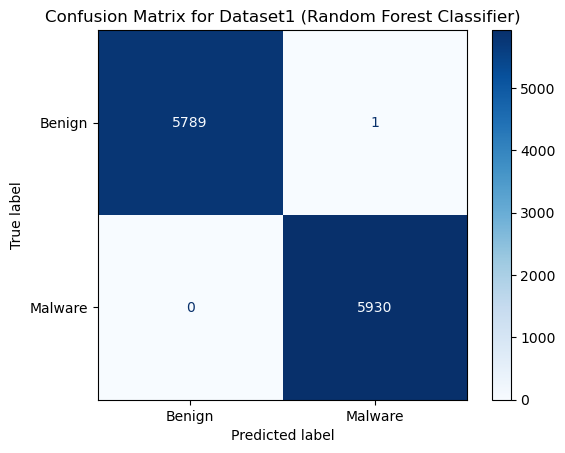

In [163]:
# Generate the confusion matrix for dataset 1
conf_matrix_for_dataset1 = confusion_matrix(y1_test, test1_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset1, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset1 (Random Forest Classifier)")
plt.show()

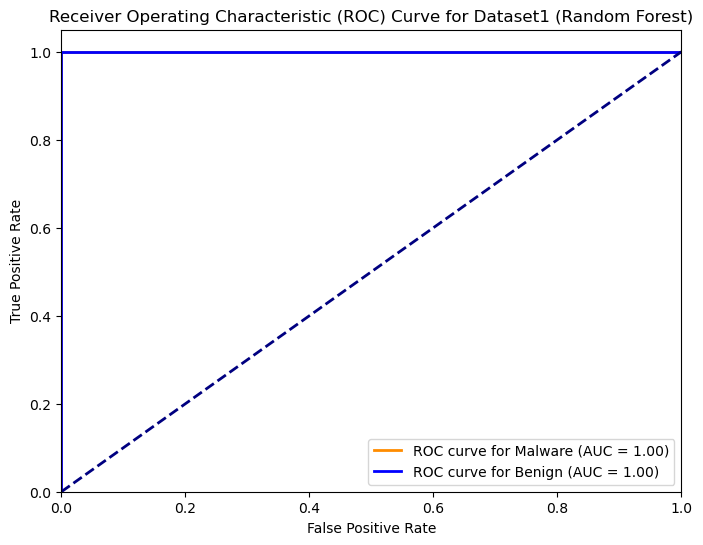

AUC for Malware: 1.00
AUC for Benign: 1.00


In [164]:
#ROC Curve for Dataset1
# Binarize the output labels for AUC calculation
y1_test_bin = label_binarize(y1_test, classes=['Benign', 'Malware'])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate for the 'Malware' class
fpr['Malware'], tpr['Malware'], _ = roc_curve(y1_test_bin[:, 0], test_prob[:, 1])
roc_auc['Malware'] = auc(fpr['Malware'], tpr['Malware'])

# Calculate for the 'Benign' class
fpr['Benign'], tpr['Benign'], _ = roc_curve(1 - y1_test_bin[:, 0], test_prob[:, 0])
roc_auc['Benign'] = auc(fpr['Benign'], tpr['Benign'])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

# Plot ROC curve for 'Malware'
plt.plot(fpr['Malware'], tpr['Malware'], color='darkorange', lw=2,
         label=f'ROC curve for Malware (AUC = {roc_auc["Malware"]:.2f})')

# Plot ROC curve for 'Benign'
plt.plot(fpr['Benign'], tpr['Benign'], color='blue', lw=2,
         label=f'ROC curve for Benign (AUC = {roc_auc["Benign"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset1 (Random Forest)')
plt.legend(loc="lower right")
plt.show()

# Print the AUC values
print(f"AUC for Malware: {roc_auc['Malware']:.2f}")
print(f"AUC for Benign: {roc_auc['Benign']:.2f}")


In [168]:
#For Dataset2
# Assuming X2_train, X2_test, y2_train, y2_test are already defined

# Initialize the Random Forest Classifier
clf2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training dataset for Dataset 1
clf2.fit(x2_train, y2_train)

ML_Algorithm_for_Dataset2 = {}
# Make predictions on the test dataset
test2_pred = clf2.predict(x2_test)

# Predict probabilities for ROC curve
test_prob = clf2.predict_proba(x2_test)

#Accuracy, Precision, Recall, and F1 score for experiment2
# Accuracy Score
test_accuracy_for_dataset2 = accuracy_score(y2_test, test2_pred)
print(f"Accuracy on Test Set for Dataset2: {test_accuracy_for_dataset2}")

# Precision Score
test_precision_for_dataset2 = precision_score(y2_test, test2_pred, pos_label='Malware')
print(f"Precision on Test Set for Dataset2: {test_precision_for_dataset2}")

# Recall Score
test_recall_for_dataset2 = recall_score(y2_test, test2_pred, pos_label='Malware')
print(f"Recall on Test Set for Dataset2: {test_recall_for_dataset2}")

# F1 Score
test_f1_for_dataset2 = f1_score(y2_test, test2_pred, pos_label='Malware')
print(f"F1 Score on Test Set for Dataset2: {test_f1_for_dataset2}")

ML_Algorithm_for_Dataset2['Random Forest Classifier'] =[test_accuracy_for_dataset2, test_precision_for_dataset2, test_recall_for_dataset2, test_f1_for_dataset2] 
print(ML_Algorithm_for_Dataset2.items())

Accuracy on Test Set for Dataset2: 0.9998862278855453
Precision on Test Set for Dataset2: 0.999886736889795
Recall on Test Set for Dataset2: 0.999886736889795
F1 Score on Test Set for Dataset2: 0.999886736889795
dict_items([('Random Forest Classifier', [0.9998862278855453, 0.999886736889795, 0.999886736889795, 0.999886736889795])])


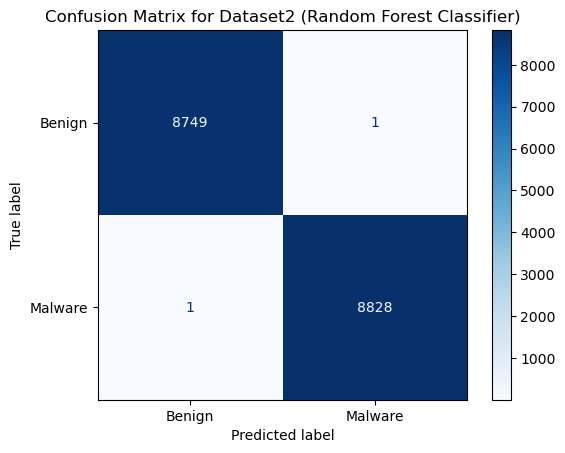

In [169]:
# Generate the confusion matrix for dataset2
conf_matrix_for_dataset2 = confusion_matrix(y2_test, test2_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset2, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset2 (Random Forest Classifier)")
plt.show()

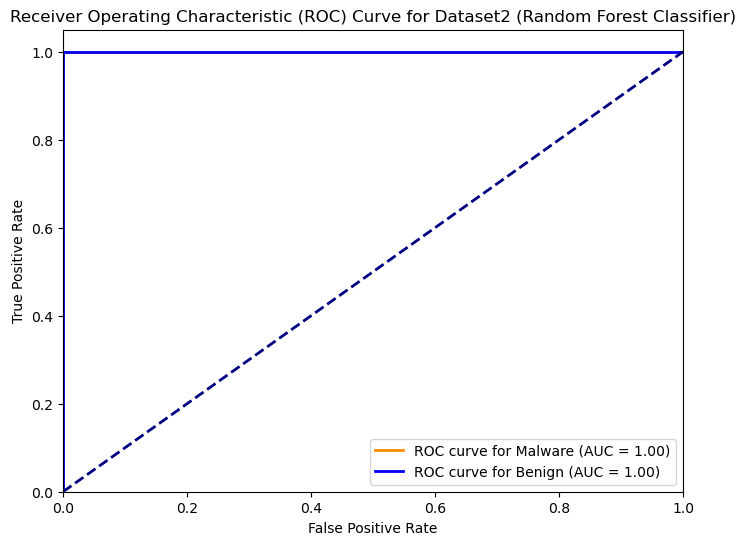

AUC for Malware: 1.00
AUC for Benign: 1.00


In [172]:
#ROC Curve for Dataset2
# Binarize the output labels for AUC calculation
y2_test_bin = label_binarize(y2_test, classes=['Benign', 'Malware'])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate for the 'Malware' class
fpr['Malware'], tpr['Malware'], _ = roc_curve(y2_test_bin[:, 0], test_prob[:, 1])
roc_auc['Malware'] = auc(fpr['Malware'], tpr['Malware'])

# Calculate for the 'Benign' class
fpr['Benign'], tpr['Benign'], _ = roc_curve(1 - y2_test_bin[:, 0], test_prob[:, 0])
roc_auc['Benign'] = auc(fpr['Benign'], tpr['Benign'])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

# Plot ROC curve for 'Malware'
plt.plot(fpr['Malware'], tpr['Malware'], color='darkorange', lw=2,
         label=f'ROC curve for Malware (AUC = {roc_auc["Malware"]:.2f})')

# Plot ROC curve for 'Benign'
plt.plot(fpr['Benign'], tpr['Benign'], color='blue', lw=2,
         label=f'ROC curve for Benign (AUC = {roc_auc["Benign"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset2 (Random Forest Classifier)')
plt.legend(loc="lower right")
plt.show()

# Print the AUC values
print(f"AUC for Malware: {roc_auc['Malware']:.2f}")
print(f"AUC for Benign: {roc_auc['Benign']:.2f}")

In [174]:
#Support Vector Machine 

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming X1_train, X1_test, y1_train, y1_test are already defined

# Initialize the Support Vector Machine (SVM) model with probability=True to enable probability estimates
clf1 = SVC(probability=True, random_state=42)

# Train the model on the training dataset
clf1.fit(x1_train, y1_train)

# Make predictions on the test dataset
test1_pred = clf1.predict(x1_test)

# Predict probabilities for ROC curve
test_prob = clf1.predict_proba(x1_test)

#Accuracy Score
test_accuracy_for_dataset1 = accuracy_score(y1_test, test1_pred)
print(f"Accuracy on Test Set for Dataset1: {test_accuracy_for_dataset1}")

# Precision Score
test_precision_for_dataset1 = precision_score(y1_test, test1_pred, pos_label='Malware')
print(f"Precision on Test Set for Dataset1: {test_precision_for_dataset1}")

# Recall Score
test_recall_for_dataset1 = recall_score(y1_test, test1_pred, pos_label='Malware')
print(f"Recall on Test Set for Dataset1: {test_recall_for_dataset1}")

# F1 Score
test_f1_for_dataset1 = f1_score(y1_test, test1_pred, pos_label='Malware')
print(f"F1 Score on Test Set for Dataset1: {test_f1_for_dataset1}")

ML_Algorithm_for_Dataset1['Support Vector Classifier']=[test_accuracy_for_dataset1, test_precision_for_dataset1, test_recall_for_dataset1, test_f1_for_dataset1]
print(ML_Algorithm_for_Dataset1.items())

Accuracy on Test Set for Dataset1: 0.986518771331058
Precision on Test Set for Dataset1: 0.9790836653386454
Recall on Test Set for Dataset1: 0.9946037099494098
F1 Score on Test Set for Dataset1: 0.986782666889744
dict_items([('Random Forest Classifier', [0.999914675767918, 0.9998313943685719, 1.0, 0.999915690076722]), ('Support Vector Classifier', [0.986518771331058, 0.9790836653386454, 0.9946037099494098, 0.986782666889744])])


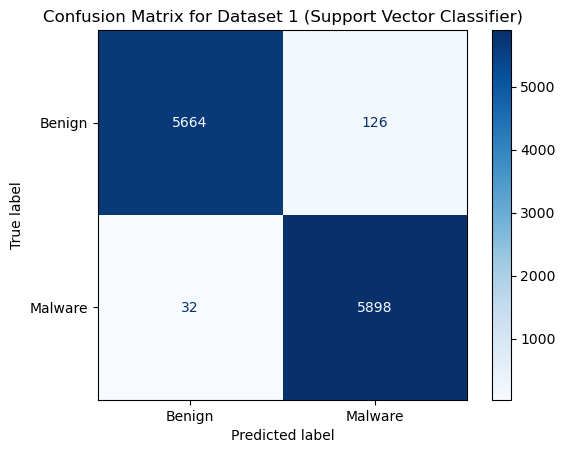

In [175]:
# Generate the confusion matrix for Dataset 1 (Support Vector Classifier)
conf_matrix_for_dataset1 = confusion_matrix(y1_test, test1_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset1, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset 1 (Support Vector Classifier)")
plt.show()

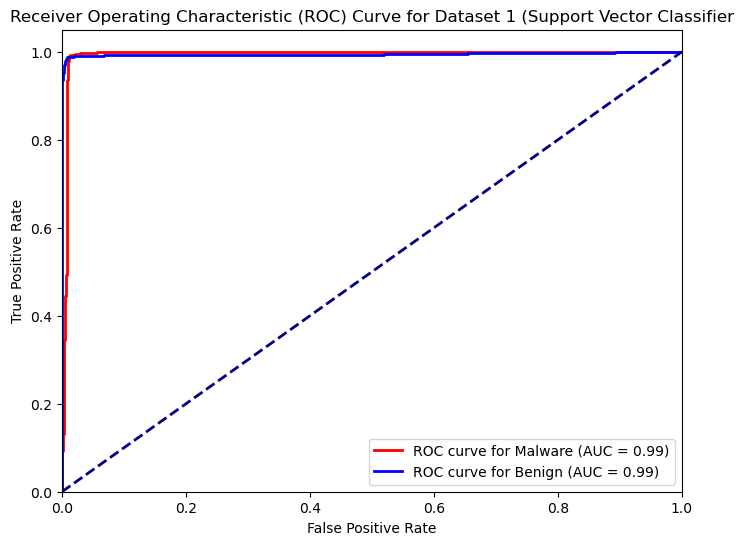

AUC for Malware: 0.99
AUC for Benign: 0.99


In [176]:
#For dataset 1 (support vector classifier)
#Binarize the output labels for AUC calculation
y1_test_bin = label_binarize(y1_test, classes=['Benign', 'Malware'])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate for the 'Malware' class
fpr['Malware'], tpr['Malware'], _ = roc_curve(y1_test_bin[:, 0], test_prob[:, 1])
roc_auc['Malware'] = auc(fpr['Malware'], tpr['Malware'])

# Calculate for the 'Benign' class
fpr['Benign'], tpr['Benign'], _ = roc_curve(1 - y1_test_bin[:, 0], test_prob[:, 0])
roc_auc['Benign'] = auc(fpr['Benign'], tpr['Benign'])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

# Plot ROC curve for 'Malware'
plt.plot(fpr['Malware'], tpr['Malware'], color='red', lw=2,
         label=f'ROC curve for Malware (AUC = {roc_auc["Malware"]:.2f})')

# Plot ROC curve for 'Benign'
plt.plot(fpr['Benign'], tpr['Benign'], color='blue', lw=2,
         label=f'ROC curve for Benign (AUC = {roc_auc["Benign"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset 1 (Support Vector Classifier')
plt.legend(loc="lower right")
plt.show()

# Print the AUC values
print(f"AUC for Malware: {roc_auc['Malware']:.2f}")
print(f"AUC for Benign: {roc_auc['Benign']:.2f}")

In [177]:
#For Dataset2
# Assuming X2_train, X2_test, y2_train, y2_test are already defined

# Initialize the Support Vector Machine (SVM) model with probability=True to enable probability estimates
clf2 = SVC(probability=True, random_state=42)

# Train the model on the training dataset
clf2.fit(x2_train, y2_train)

# Make predictions on the test dataset
test2_pred = clf2.predict(x2_test)

# Predict probabilities for ROC curve
test_prob = clf2.predict_proba(x2_test)

#Accuracy Score
test_accuracy_for_dataset2 = accuracy_score(y2_test, test2_pred)
print(f"Accuracy on Test Set for Dataset2: {test_accuracy_for_dataset2}")

# Precision Score
test_precision_for_dataset2 = precision_score(y2_test, test2_pred, pos_label='Malware')
print(f"Precision on Test Set for Dataset2: {test_precision_for_dataset2}")

# Recall Score
test_recall_for_dataset2 = recall_score(y2_test, test2_pred, pos_label='Malware')
print(f"Recall on Test Set for Dataset2: {test_recall_for_dataset2}")

# F1 Score
test_f1_for_dataset2 = f1_score(y2_test, test2_pred, pos_label='Malware')
print(f"F1 Score on Test Set for Dataset2: {test_f1_for_dataset2}")

ML_Algorithm_for_Dataset2['Support Vector Classifier']=[test_accuracy_for_dataset2, test_precision_for_dataset2, test_recall_for_dataset2, test_f1_for_dataset2]
print(ML_Algorithm_for_Dataset2.items())

Accuracy on Test Set for Dataset2: 0.9850958530064281
Precision on Test Set for Dataset2: 0.9766329142094136
Recall on Test Set for Dataset2: 0.9941103182693397
F1 Score on Test Set for Dataset2: 0.9852941176470589
dict_items([('Random Forest Classifier', [0.9998862278855453, 0.999886736889795, 0.999886736889795, 0.999886736889795]), ('Support Vector Classifier', [0.9850958530064281, 0.9766329142094136, 0.9941103182693397, 0.9852941176470589])])


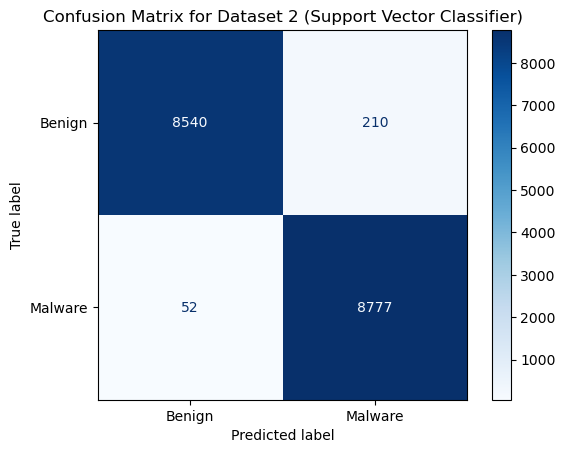

In [178]:
# Generate the confusion matrix for Dataset 1 (Support Vector Classifier)
conf_matrix_for_dataset2 = confusion_matrix(y2_test, test2_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset2, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset 2 (Support Vector Classifier)")
plt.show()

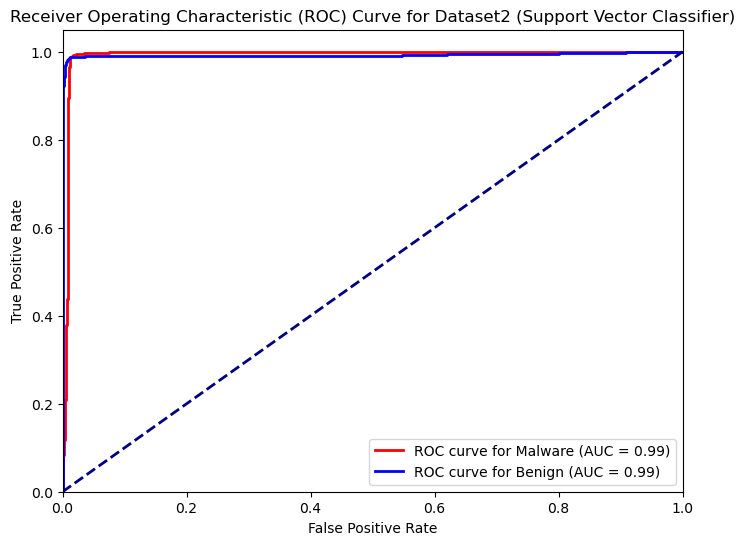

AUC for Malware: 0.99
AUC for Benign: 0.99


In [184]:
#Support Vector Classifier for Dataset2
# Binarize the output labels for AUC calculation
y2_test_bin = label_binarize(y2_test, classes=['Benign', 'Malware'])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate for the 'Malware' class
fpr['Malware'], tpr['Malware'], _ = roc_curve(y2_test_bin[:, 0], test_prob[:, 1])
roc_auc['Malware'] = auc(fpr['Malware'], tpr['Malware'])

# Calculate for the 'Benign' class
fpr['Benign'], tpr['Benign'], _ = roc_curve(1 - y2_test_bin[:, 0], test_prob[:, 0])
roc_auc['Benign'] = auc(fpr['Benign'], tpr['Benign'])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

# Plot ROC curve for 'Malware'
plt.plot(fpr['Malware'], tpr['Malware'], color='red', lw=2,
         label=f'ROC curve for Malware (AUC = {roc_auc["Malware"]:.2f})')

# Plot ROC curve for 'Benign'
plt.plot(fpr['Benign'], tpr['Benign'], color='blue', lw=2,
         label=f'ROC curve for Benign (AUC = {roc_auc["Benign"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset2 (Support Vector Classifier)')
plt.legend(loc="lower right")
plt.show()

# Print the AUC values
print(f"AUC for Malware: {roc_auc['Malware']:.2f}")
print(f"AUC for Benign: {roc_auc['Benign']:.2f}")

In [186]:
#Gradient Boosting Classifier

In [188]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

#For Dataset1
# Assuming X1_train, X1_test, y1_train, y1_test are already defined

# Initialize the Gradient Boosting Classifier
clf1 = GradientBoostingClassifier(random_state=42)

# Train the model on the training dataset
clf1.fit(x1_train, y1_train)

# Make predictions on the test dataset
test1_pred = clf1.predict(x1_test)

# Predict probabilities for ROC curve
test_prob = clf1.predict_proba(x1_test)

#Accuracy Score
test_accuracy_for_dataset1 = accuracy_score(y1_test, test1_pred)
print(f"Accuracy on Test Set for Dataset1: {test_accuracy_for_dataset1}")

# Precision Score
test_precision_for_dataset1 = precision_score(y1_test, test1_pred, pos_label='Malware')
print(f"Precision on Test Set for Dataset1: {test_precision_for_dataset1}")

# Recall Score
test_recall_for_dataset1 = recall_score(y1_test, test1_pred, pos_label='Malware')
print(f"Recall on Test Set for Dataset1: {test_recall_for_dataset1}")

# F1 Score
test_f1_for_dataset1 = f1_score(y1_test, test1_pred, pos_label='Malware')
print(f"F1 Score on Test Set for Dataset1: {test_f1_for_dataset1}")

ML_Algorithm_for_Dataset1['Gradient Boosting Classifier']=[test_accuracy_for_dataset1, test_precision_for_dataset1, test_recall_for_dataset1, test_f1_for_dataset1]
print(ML_Algorithm_for_Dataset1.items())

Accuracy on Test Set for Dataset1: 0.9995733788395904
Precision on Test Set for Dataset1: 1.0
Recall on Test Set for Dataset1: 0.9991568296795953
F1 Score on Test Set for Dataset1: 0.9995782370307887
dict_items([('Random Forest Classifier', [0.999914675767918, 0.9998313943685719, 1.0, 0.999915690076722]), ('Support Vector Classifier', [0.986518771331058, 0.9790836653386454, 0.9946037099494098, 0.986782666889744]), ('Gradient Boosting Classifier', [0.9995733788395904, 1.0, 0.9991568296795953, 0.9995782370307887])])


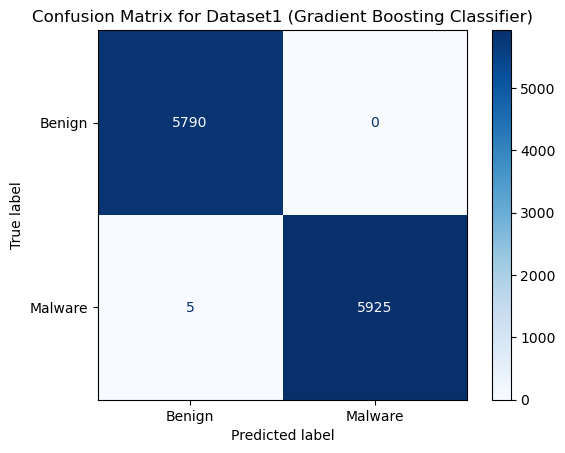

In [189]:
# Generate the confusion matrix for Dataset 1 (Gradient Boosting Classifier)
conf_matrix_for_dataset1 = confusion_matrix(y1_test, test1_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset1, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset1 (Gradient Boosting Classifier)")
plt.show()

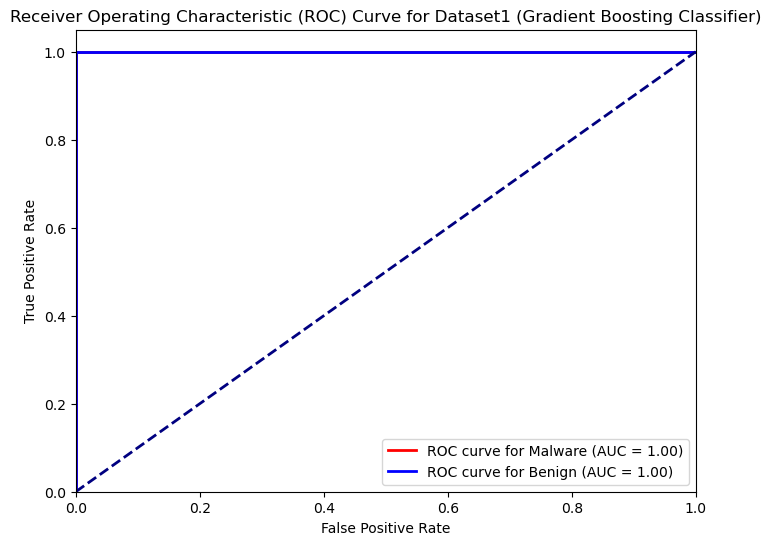

AUC for Malware: 1.00
AUC for Benign: 1.00


In [190]:
# Binarize the output labels for AUC calculation
y1_test_bin = label_binarize(y1_test, classes=['Benign', 'Malware'])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate for the 'Malware' class
fpr['Malware'], tpr['Malware'], _ = roc_curve(y1_test_bin[:, 0], test_prob[:, 1])
roc_auc['Malware'] = auc(fpr['Malware'], tpr['Malware'])

# Calculate for the 'Benign' class
fpr['Benign'], tpr['Benign'], _ = roc_curve(1 - y1_test_bin[:, 0], test_prob[:, 0])
roc_auc['Benign'] = auc(fpr['Benign'], tpr['Benign'])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

# Plot ROC curve for 'Malware'
plt.plot(fpr['Malware'], tpr['Malware'], color='red', lw=2,
         label=f'ROC curve for Malware (AUC = {roc_auc["Malware"]:.2f})')

# Plot ROC curve for 'Benign'
plt.plot(fpr['Benign'], tpr['Benign'], color='blue', lw=2,
         label=f'ROC curve for Benign (AUC = {roc_auc["Benign"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset1 (Gradient Boosting Classifier)')
plt.legend(loc="lower right")
plt.show()

# Print the AUC values
print(f"AUC for Malware: {roc_auc['Malware']:.2f}")
print(f"AUC for Benign: {roc_auc['Benign']:.2f}")

In [194]:
#For Dataset2
# Assuming X2_train, X2_test, y2_train, y2_test are already defined

# Initialize the Gradient Boosting Classifier
clf2 = GradientBoostingClassifier(random_state=42)

# Train the model on the training dataset
clf2.fit(x2_train, y2_train)

# Make predictions on the test dataset
test2_pred = clf2.predict(x2_test)

# Predict probabilities for ROC curve
test_prob = clf2.predict_proba(x2_test)

#Accuracy Score
test_accuracy_for_dataset2 = accuracy_score(y2_test, test2_pred)
print(f"Accuracy on Test Set for Dataset2: {test_accuracy_for_dataset2}")

# Precision Score
test_precision_for_dataset2 = precision_score(y2_test, test2_pred, pos_label='Malware')
print(f"Precision on Test Set for Dataset2: {test_precision_for_dataset2}")

# Recall Score
test_recall_for_dataset2 = recall_score(y2_test, test2_pred, pos_label='Malware')
print(f"Recall on Test Set for Dataset2: {test_recall_for_dataset2}")

# F1 Score
test_f1_for_dataset2 = f1_score(y2_test, test2_pred, pos_label='Malware')
print(f"F1 Score on Test Set for Dataset2: {test_f1_for_dataset2}")

ML_Algorithm_for_Dataset2['Gradient Boosting Classifier']=[test_accuracy_for_dataset2, test_precision_for_dataset2, test_recall_for_dataset2, test_f1_for_dataset2]
print(ML_Algorithm_for_Dataset2.items())

Accuracy on Test Set for Dataset2: 0.9998293418283178
Precision on Test Set for Dataset2: 1.0
Recall on Test Set for Dataset2: 0.9996602106693849
F1 Score on Test Set for Dataset2: 0.9998300764655905
dict_items([('Random Forest Classifier', [0.9998862278855453, 0.999886736889795, 0.999886736889795, 0.999886736889795]), ('Support Vector Classifier', [0.9850958530064281, 0.9766329142094136, 0.9941103182693397, 0.9852941176470589]), ('Gradient Boosting Classifier', [0.9998293418283178, 1.0, 0.9996602106693849, 0.9998300764655905])])


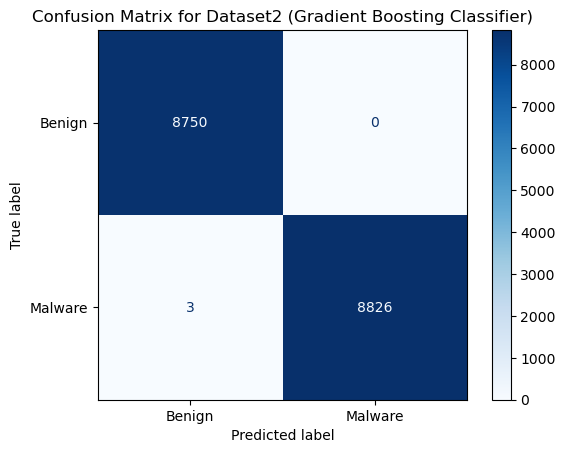

In [195]:
# Generate the confusion matrix for Dataset 2 (Gradient Boosting Classifier)
conf_matrix_for_dataset2 = confusion_matrix(y2_test, test2_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset2, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset2 (Gradient Boosting Classifier)")
plt.show()

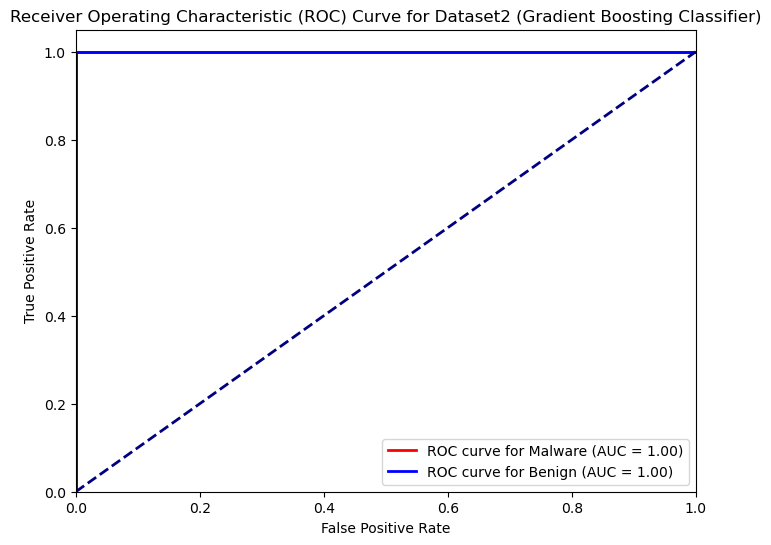

AUC for Malware: 1.00
AUC for Benign: 1.00


In [196]:
#For Experiment2
# Binarize the output labels for AUC calculation
y2_test_bin = label_binarize(y2_test, classes=['Benign', 'Malware'])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate for the 'Malware' class
fpr['Malware'], tpr['Malware'], _ = roc_curve(y2_test_bin[:, 0], test_prob[:, 1])
roc_auc['Malware'] = auc(fpr['Malware'], tpr['Malware'])

# Calculate for the 'Benign' class
fpr['Benign'], tpr['Benign'], _ = roc_curve(1 - y2_test_bin[:, 0], test_prob[:, 0])
roc_auc['Benign'] = auc(fpr['Benign'], tpr['Benign'])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

# Plot ROC curve for 'Malware'
plt.plot(fpr['Malware'], tpr['Malware'], color='red', lw=2,
         label=f'ROC curve for Malware (AUC = {roc_auc["Malware"]:.2f})')

# Plot ROC curve for 'Benign'
plt.plot(fpr['Benign'], tpr['Benign'], color='blue', lw=2,
         label=f'ROC curve for Benign (AUC = {roc_auc["Benign"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset2 (Gradient Boosting Classifier)')
plt.legend(loc="lower right")
plt.show()

# Print the AUC values
print(f"AUC for Malware: {roc_auc['Malware']:.2f}")
print(f"AUC for Benign: {roc_auc['Benign']:.2f}")

In [200]:
#To start comparison between Dataset1 and Dataset2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load Result of Support Vector Classifier, Gradient Booosting Classifier, and Random Forest Classifier to dataframe

In [202]:
#Dataset1 Results
df1 = pd.DataFrame(ML_Algorithm_for_Dataset1)
df1.head()

,Random Forest Classifier,Support Vector Classifier,Gradient Boosting Classifier
0,0.999915,0.986519,0.999573
1,0.999831,0.979084,1.000000
2,1.000000,0.994604,0.999157
3,0.999916,0.986783,0.999578


In [204]:
df1.index = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
df1.head()

,Random Forest Classifier,Support Vector Classifier,Gradient Boosting Classifier
Accuracy Score,0.999915,0.986519,0.999573
Precision Score,0.999831,0.979084,1.000000
Recall Score,1.000000,0.994604,0.999157
F1 Score,0.999916,0.986783,0.999578


In [206]:
#Dataset2 Result
df2 = pd.DataFrame(ML_Algorithm_for_Dataset2)
df2.head()

,Random Forest Classifier,Support Vector Classifier,Gradient Boosting Classifier
0,0.999886,0.985096,0.999829
1,0.999887,0.976633,1.000000
2,0.999887,0.994110,0.999660
3,0.999887,0.985294,0.999830


In [214]:
df2.index = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
df2.head()

,Random Forest Classifier,Support Vector Classifier,Gradient Boosting Classifier
Accuracy Score,0.999886,0.985096,0.999829
Precision Score,0.999887,0.976633,1.000000
Recall Score,0.999887,0.994110,0.999660
F1 Score,0.999887,0.985294,0.999830


In [216]:
#merge the dataframe of the Dataset1 and Dataset2 results
df_combined_ML = pd.merge(df1, df2, left_index=True, right_index=True, suffixes=('_Dataset1', '_Dataset2'))
df_combined_ML.head()

,Random Forest Classifier_Dataset1,Support Vector Classifier_Dataset1,Gradient Boosting Classifier_Dataset1,Random Forest Classifier_Dataset2,Support Vector Classifier_Dataset2,Gradient Boosting Classifier_Dataset2
Accuracy Score,0.999915,0.986519,0.999573,0.999886,0.985096,0.999829
Precision Score,0.999831,0.979084,1.000000,0.999887,0.976633,1.000000
Recall Score,1.000000,0.994604,0.999157,0.999887,0.994110,0.999660
F1 Score,0.999916,0.986783,0.999578,0.999887,0.985294,0.999830


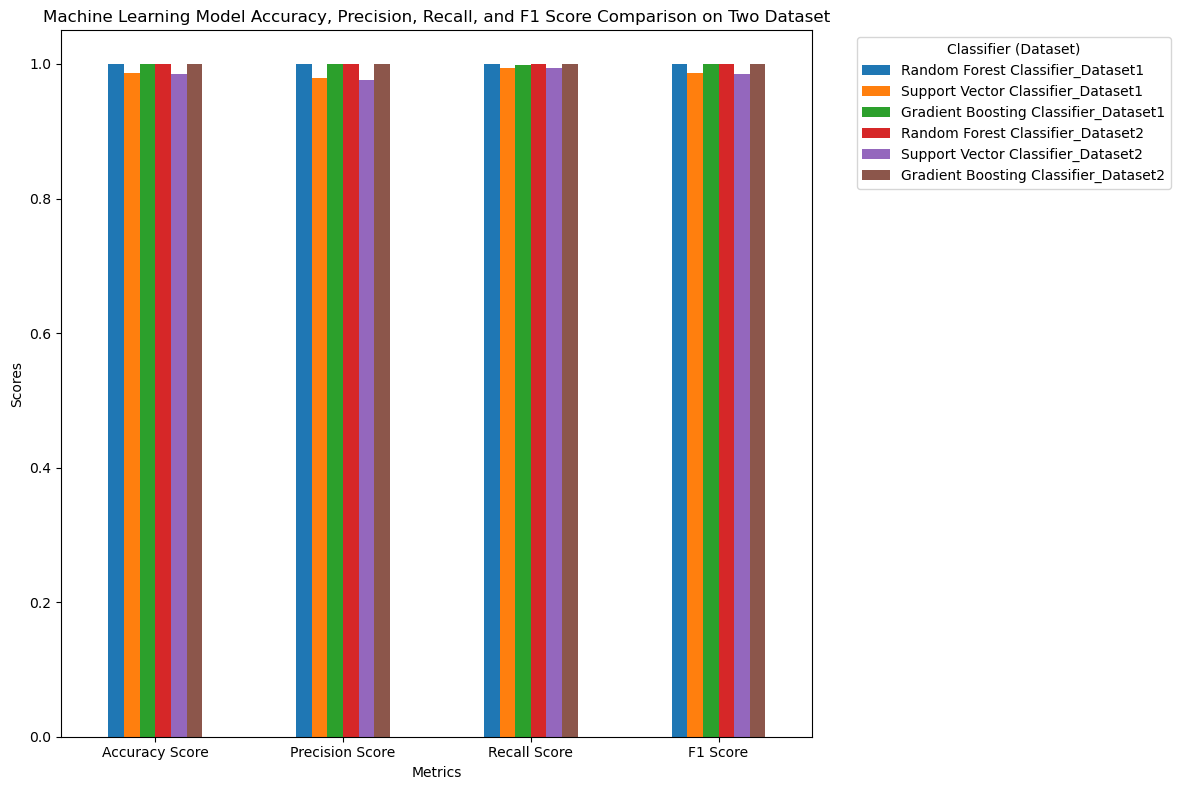

In [218]:
# Plotting the comparison OF Dataset1 and Dataset2 using a grouped bar chart
df_combined_ML.plot(kind='bar', figsize=(12, 8))
plt.title('Machine Learning Model Accuracy, Precision, Recall, and F1 Score Comparison on Two Dataset')
plt.ylabel('Scores')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Classifier (Dataset)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

In [220]:
#Deep Learning
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [222]:
Dataset1.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,...,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.ngeneric,Class
0,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,3161,...,138,389,221,26,24,116,121,87,8,Benign
1,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,3761,...,138,392,222,26,24,118,122,87,8,Benign
2,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,3996,...,137,395,222,26,27,118,120,88,8,Benign
3,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,2961,...,138,395,222,26,27,118,120,88,8,Benign
4,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,3834,...,138,392,222,26,24,118,124,87,8,Benign


In [224]:
Dataset2.head()

,pslist_nproc,pslist_nppid,pslist_avg_threads,pslist_avg_handlers,dlllist_ndlls,dlllist_avg_dlls_per_proc,handles_nhandles,handles_avg_handles_per_proc,handles_nfile,handles_nevent,...,psxview_not_in_deskthrd_false_avg,modules_nmodules,svcscan_nservices,svcscan_kernel_drivers,svcscan_fs_drivers,svcscan_process_services,svcscan_shared_process_services,svcscan_nactive,callbacks_ncallbacks,Label
0,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,3161,...,0.191489,138,389,221,26,24,116,121,87,Benign
1,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,3761,...,0.127660,138,392,222,26,24,118,122,87,Benign
2,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,3996,...,0.125000,137,395,222,26,27,118,120,88,Benign
3,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,2961,...,0.187500,138,395,222,26,27,118,120,88,Benign
4,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,3834,...,0.217391,138,392,222,26,24,118,124,87,Benign


In [226]:
#For Dataset1
x1 = Dataset1.iloc[:,:-1].values
y1 = Dataset1.iloc[:,-1].values

#For Dataset2
x2 = Dataset1.iloc[:,:-1].values
y2 = Dataset1.iloc[:,-1].values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset1 into training and testing sets
#For Dataset 1
x1_train, x1_test, y1_train, y1_test = train_test_split(
 x1, y1, test_size=0.2, random_state=42)

#For Dataset1
# Change the Benign and Malware to numeric. Let malware be 1, and Benign be 0
y1_train = np.where(y1_train == 'Malware', 1, np.where(y1_train == 'Benign', 0, y1_train))
y1_test = np.where(y1_test == 'Malware', 1, np.where(y1_test == 'Benign', 0, y1_test))

# Convert data to appropriate type
x1_train = np.array(x1_train, dtype=np.float32)
y1_train = np.array(y1_train, dtype=np.float32)
x1_test = np.array(x1_test, dtype=np.float32)
y1_test = np.array(y1_test, dtype=np.float32)

# Split dataset2 into training and testing sets
#for Dataset 2
x2_train, x2_test, y2_train, y2_test = train_test_split(
 x2, y2, test_size=0.3, random_state=42)

#For Dataset2
# Change the Benign and Malware to numeric. Let malware be 1, and Benign be 0
y2_train = np.where(y2_train == 'Malware', 1, np.where(y2_train == 'Benign', 0, y2_train))
y2_test = np.where(y2_test == 'Malware', 1, np.where(y2_test == 'Benign', 0, y2_test))

# Convert data to appropriate type
x2_train = np.array(x2_train, dtype=np.float32)
y2_train = np.array(y2_train, dtype=np.float32)
x2_test = np.array(x2_test, dtype=np.float32)
y2_test = np.array(y2_test, dtype=np.float32)

In [228]:
#Multi-Layer Perceptron (MLP)

In [232]:
#For Dataset1
# Initialize MLP model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.optimizers import Adam

# Initialize MLP model
model_mlp = Sequential()

# Add the Input layer with the specified shape
model_mlp.add(Input(shape=(x1_train.shape[1],)))

# Add the Dense layers
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(32, activation='relu'))

# Output layer with sigmoid activation for binary classification
model_mlp.add(Dense(1, activation='sigmoid'))

# Compile the model
model_mlp.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for Dataset1
model_mlp.fit(x1_train, y1_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7704 - loss: 13.3217 - val_accuracy: 0.9869 - val_loss: 0.2464
Epoch 2/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9749 - loss: 0.3349 - val_accuracy: 0.9834 - val_loss: 0.1509
Epoch 3/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9781 - loss: 0.2179 - val_accuracy: 0.9953 - val_loss: 0.1010
Epoch 4/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9793 - loss: 0.3097 - val_accuracy: 0.9693 - val_loss: 0.3371
Epoch 5/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9850 - loss: 0.2040 - val_accuracy: 0.9716 - val_loss: 0.3250
Epoch 6/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9832 - loss: 0.2667 - val_accuracy: 0.9873 - val_loss: 0.1242
Epoch 7/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9852 - loss: 0.1838 - val_accuracy: 0.9948 - val_loss: 0.1221
Epoch 8/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9901 - loss: 0.1233 -

In [559]:
y1_pred = (model_mlp.predict(x1_test) > 0.5).astype(int)
DL_Algorithm_for_Dataset1 = {}
y1_test =y1_test.astype(int)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [561]:
#Accuracy, Precision, Recall, and F1 score for Dataset1 (#Multi-Layer Perceptron (MLP))
# Accuracy Score
test_accuracy_for_dataset1 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy on Test Set for Dataset1: {test_accuracy_for_dataset1}")

# Precision Score
test_precision_for_dataset1 = precision_score(y1_test, y1_pred)
print(f"Precision on Test Set for Dataset1: {test_precision_for_dataset1}")

# Recall Score
test_recall_for_dataset1 = recall_score(y1_test, y1_pred)
print(f"Recall on Test Set for Dataset1: {test_recall_for_dataset1}")

# F1 Score
test_f1_for_dataset1 = f1_score(y1_test, y1_pred)
print(f"F1 Score on Test Set for Dataset1: {test_f1_for_dataset1}")

DL_Algorithm_for_Dataset1['MLP']=[test_accuracy_for_dataset1, test_precision_for_dataset1, test_recall_for_dataset1, test_f1_for_dataset1]
print(DL_Algorithm_for_Dataset1.items())

Accuracy on Test Set for Dataset1: 0.9963310580204778
Precision on Test Set for Dataset1: 0.9951219512195122
Recall on Test Set for Dataset1: 0.9976391231028667
F1 Score on Test Set for Dataset1: 0.996378947368421
dict_items([('MLP', [0.9963310580204778, 0.9951219512195122, 0.9976391231028667, 0.996378947368421])])


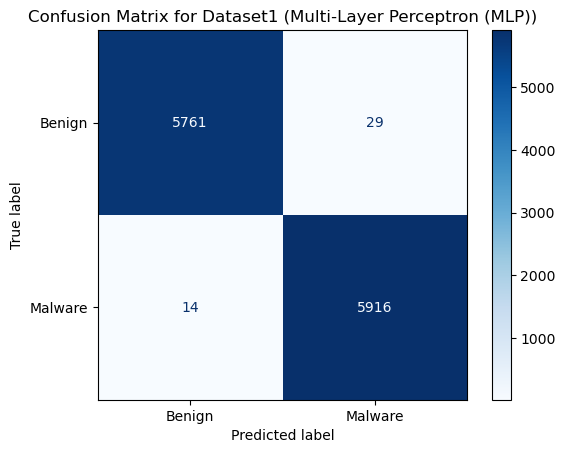

In [563]:
#Generate the confusion matrix for dataset 1
conf_matrix_for_dataset1 = confusion_matrix(y1_test, y1_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset1, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset1 (Multi-Layer Perceptron (MLP))")
plt.show()

367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


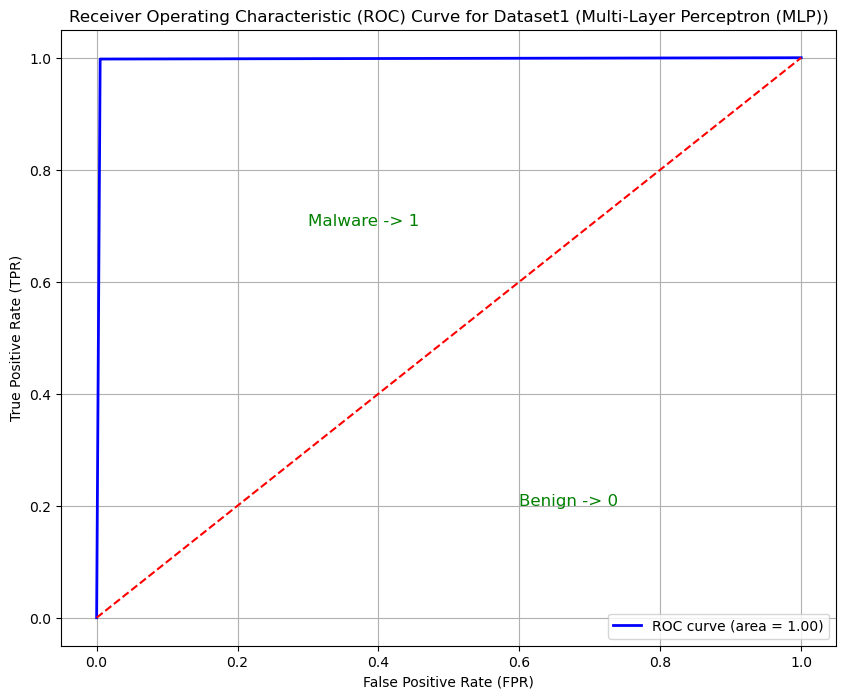

In [565]:
# Assuming y1_test are the true labels and y1_pred_prob are the predicted probabilities
# y1_pred_prob should be the probabilities predicted by the model, not the binary classes
y1_pred_prob = model_mlp.predict(x1_test)

#ROC Curve for dataset1
# Calculate the ROC curve
# Compute the ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred)  # y1_test are the true labels, y1_pred are the predicted probabilities

roc_auc = roc_auc_score(y1_test, y1_pred)
plt.figure(figsize=(10, 8))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line for reference (no-discrimination line)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset1 (Multi-Layer Perceptron (MLP))')
plt.legend(loc="lower right")

# Annotate the plot with the labels 'Benign' and 'Malware'
plt.text(0.6, 0.2, 'Benign -> 0', fontsize=12, color='green')
plt.text(0.3, 0.7, 'Malware -> 1', fontsize=12, color='green')

# Show the plot
plt.grid()
plt.show()

In [567]:
#For Dataset2
# Initialize MLP model
model_mlp = Sequential()

# Add the Input layer with the specified shape
model_mlp.add(Input(shape=(x2_train.shape[1],)))

# Add the Dense layers
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dense(32, activation='relu'))

# Output layer with sigmoid activation for binary classification
model_mlp.add(Dense(1, activation='sigmoid'))

# Compile the model
model_mlp.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for Dataset2
model_mlp.fit(x2_train, y2_train, epochs=20, batch_size=32, validation_split=0.3)

Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8291 - loss: 20.9642 - val_accuracy: 0.9891 - val_loss: 0.2432
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9825 - loss: 0.3207 - val_accuracy: 0.9924 - val_loss: 0.2669
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9874 - loss: 0.2571 - val_accuracy: 0.9931 - val_loss: 0.2138
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9843 - loss: 0.4006 - val_accuracy: 0.9937 - val_loss: 0.1727
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9838 - loss: 0.3325 - val_accuracy: 0.9798 - val_loss: 0.4540
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.3747 - val_accuracy: 0.9946 - val_loss: 0.2101
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9800 - loss: 0.7043 - val_accuracy: 0.9938 - val_loss: 0.2657
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9891 - loss: 0.3540 - val_accuracy: 0

In [569]:
y2_pred = (model_mlp.predict(x2_test) > 0.5)
y2_test = y2_test.astype(int)
y2_pred = y2_pred.astype(int)
DL_Algorithm_for_Dataset2 ={}

550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [579]:
#Accuracy, Precision, Recall, and F1 score for Dataset2 (#Multi-Layer Perceptron (MLP))
# Accuracy Score
test_accuracy_for_dataset2 = accuracy_score(y2_test, y2_pred)
print(f"Accuracy on Test Set for Dataset2: {test_accuracy_for_dataset2}")

# Precision Score
test_precision_for_dataset2 = precision_score(y2_test, y2_pred)
print(f"Precision on Test Set for Dataset2: {test_precision_for_dataset2}")

# Recall Score
test_recall_for_dataset2 = recall_score(y2_test, y2_pred)
print(f"Recall on Test Set for Dataset2: {test_recall_for_dataset2}")

# F1 Score
test_f1_for_dataset2 = f1_score(y2_test, y2_pred)
print(f"F1 Score on Test Set for Dataset2: {test_f1_for_dataset2}")

DL_Algorithm_for_Dataset2['MLP']=[test_accuracy_for_dataset2, test_precision_for_dataset2, test_recall_for_dataset2, test_f1_for_dataset2]
print(DL_Algorithm_for_Dataset2.items())

Accuracy on Test Set for Dataset2: 0.995733545707947
Precision on Test Set for Dataset2: 0.993906567366283
Recall on Test Set for Dataset2: 0.9976214746856948
F1 Score on Test Set for Dataset2: 0.9957605562150246
dict_items([('MLP', [0.995733545707947, 0.993906567366283, 0.9976214746856948, 0.9957605562150246])])


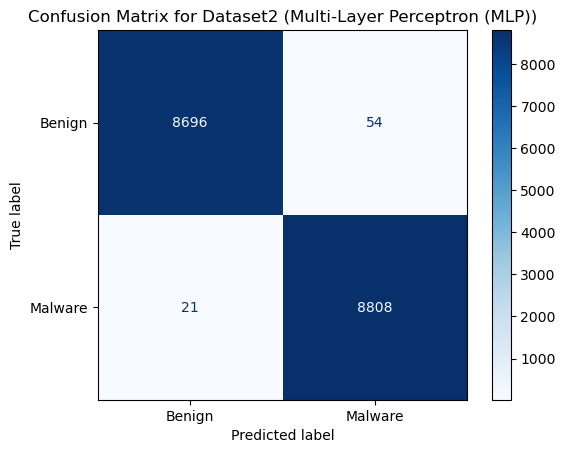

In [581]:
#Generate the confusion matrix for dataset 1
conf_matrix_for_dataset2 = confusion_matrix(y2_test, y2_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset2, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset2 (Multi-Layer Perceptron (MLP))")
plt.show()

550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


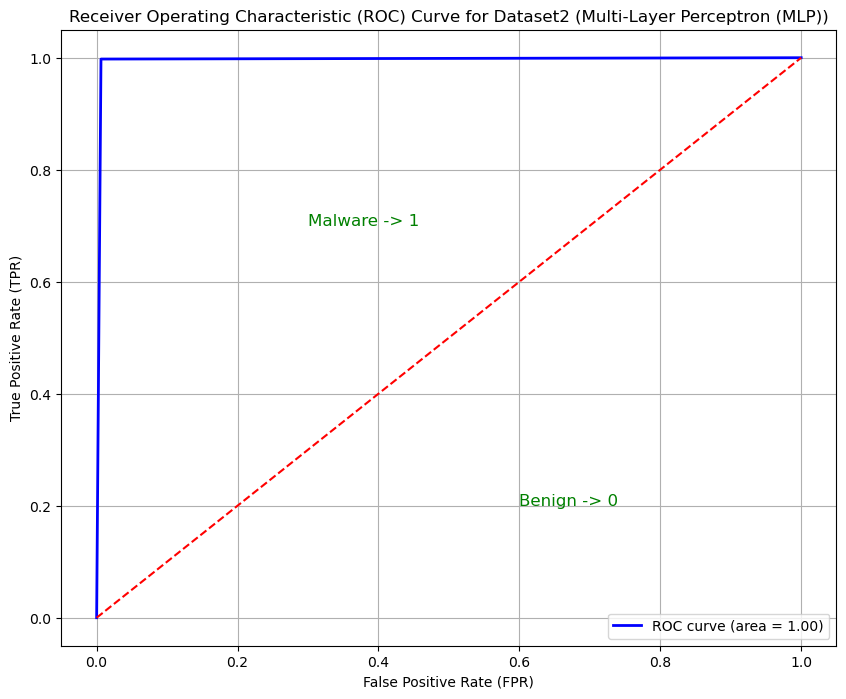

In [583]:
# Assuming y1_test are the true labels and y1_pred_prob are the predicted probabilities
# y1_pred_prob should be the probabilities predicted by the model, not the binary classes
y2_pred_prob = model_mlp.predict(x2_test)

#ROC Curve for dataset1
# Calculate the ROC curve
# Compute the ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred)  # y2_test are the true labels, y2_pred are the predicted probabilities

roc_auc = roc_auc_score(y2_test, y2_pred)
plt.figure(figsize=(10, 8))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line for reference (no-discrimination line)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset2 (Multi-Layer Perceptron (MLP))')
plt.legend(loc="lower right")

# Annotate the plot with the labels 'Benign' and 'Malware'
plt.text(0.6, 0.2, 'Benign -> 0', fontsize=12, color='green')
plt.text(0.3, 0.7, 'Malware -> 1', fontsize=12, color='green')

# Show the plot
plt.grid()
plt.show()

In [585]:
#Recurrent Neural Network (RNN) with LSTM

In [587]:
# Initialize and compile your RNN model as before
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential


features = 1
n_steps = 1

#fOR Dataset1
#RNN
# Splitting into samples

# Reshaping x1_train for model
x1_train = x1_train.reshape(x1_train.shape[0], x1_train.shape[1], features)

# The LSTM Architecture
model_lstm = Sequential()

# Adding the Input layer
model_lstm.add(Input(shape=(n_steps, features)))

# Adding the LSTM layer
model_lstm.add(LSTM(units=50, activation="tanh"))

# Adding the Dense layer
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model_lstm.summary()

# Compile the model
model_lstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(x1_train, y1_train, epochs=20, batch_size=32, validation_split=0.2)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.8325 - loss: 0.3067 - val_accuracy: 0.9886 - val_loss: 0.0491
Epoch 2/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9911 - loss: 0.0341 - val_accuracy: 0.9906 - val_loss: 0.0255
Epoch 3/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9914 - loss: 0.0247 - val_accuracy: 0.9904 - val_loss: 0.0224
Epoch 4/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9920 - loss: 0.0222 - val_accuracy: 0.9942 - val_loss: 0.0170
Epoch 5/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9943 - loss: 0.0161 - val_accuracy: 0.9963 - val_loss: 0.0129
Epoch 6/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9973 - val_loss: 0.0085
Epoch 7/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9969 - val_loss: 0.0125
Epoch 8/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9971 -

In [589]:
# Evaluate the model for Dataset1
y1_pred = (model_lstm.predict(x1_test) >0.5)
y1_test = y1_test.astype(int)
y1_pred = y1_pred.astype(int)

367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [590]:
#Accuracy, Precision, Recall, and F1 score for Dataset1 #Recurrent Neural Network (RNN) with LSTM
# Accuracy Score
test_accuracy_for_dataset1 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy on Test Set for Dataset1: {test_accuracy_for_dataset1}")

# Precision Score
test_precision_for_dataset1 = precision_score(y1_test, y1_pred)
print(f"Precision on Test Set for Dataset1: {test_precision_for_dataset1}")

# Recall Score
test_recall_for_dataset1 = recall_score(y1_test, y1_pred)
print(f"Recall on Test Set for Dataset1: {test_recall_for_dataset1}")

# F1 Score
test_f1_for_dataset1 = f1_score(y1_test, y1_pred)
print(f"F1 Score on Test Set for Dataset1: {test_f1_for_dataset1}")

DL_Algorithm_for_Dataset1['RNN']=[test_accuracy_for_dataset1, test_precision_for_dataset1, test_recall_for_dataset1, test_f1_for_dataset1]
print(DL_Algorithm_for_Dataset1.items())

Accuracy on Test Set for Dataset1: 0.9993174061433447
Precision on Test Set for Dataset1: 0.9989888776541962
Recall on Test Set for Dataset1: 0.9996627318718381
F1 Score on Test Set for Dataset1: 0.9993256911665542
dict_items([('MLP', [0.9963310580204778, 0.9951219512195122, 0.9976391231028667, 0.996378947368421]), ('RNN', [0.9993174061433447, 0.9989888776541962, 0.9996627318718381, 0.9993256911665542])])


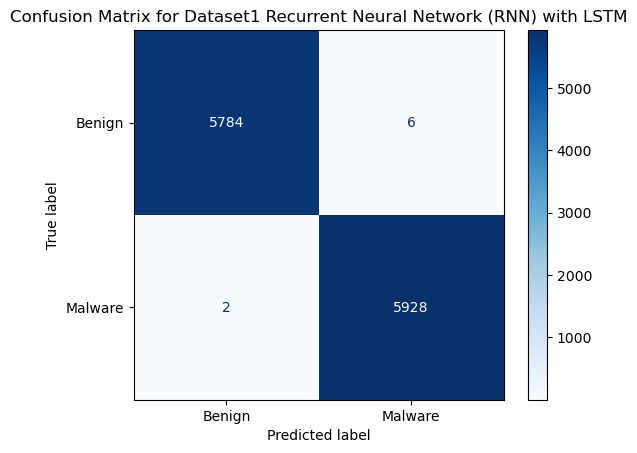

In [593]:
##RNN
#Generate the confusion matrix for dataset 1
conf_matrix_for_dataset1 = confusion_matrix(y1_test, y1_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset1, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset1 Recurrent Neural Network (RNN) with LSTM")
plt.show()

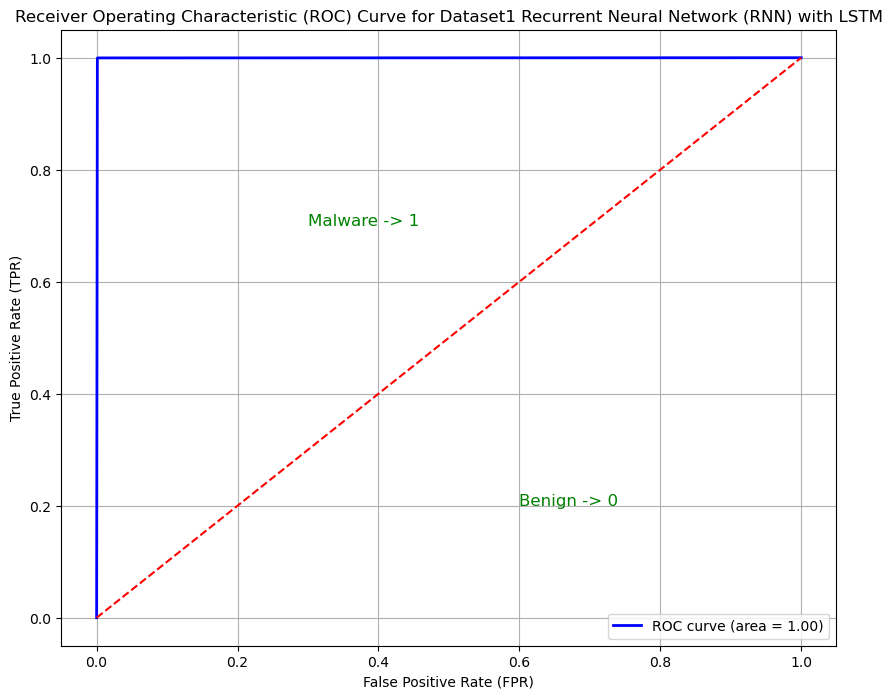

In [595]:
#ROC Curve for dataset1 for RNN
# Calculate the ROC curve
# Compute the ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred)  # y1_test are the true labels, y1_pred are the predicted probabilities

roc_auc = roc_auc_score(y1_test, y1_pred)
plt.figure(figsize=(10, 8))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line for reference (no-discrimination line)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset1 Recurrent Neural Network (RNN) with LSTM')
plt.legend(loc="lower right")

# Annotate the plot with the labels 'Benign' and 'Malware'
plt.text(0.6, 0.2, 'Benign -> 0', fontsize=12, color='green')
plt.text(0.3, 0.7, 'Malware -> 1', fontsize=12, color='green')

# Show the plot
plt.grid()
plt.show()

In [597]:
#RNN for Dataset2
#For Dataset2
x2 = Dataset2.iloc[:,:-1].values
y2 = Dataset2.iloc[:,-1].values

y2_train = np.where(y2_train == 'Malware', 1, np.where(y2_train == 'Benign', 0, y2_train))
y2_test = np.where(y2_test == 'Malware', 1, np.where(y2_test == 'Benign', 0, y2_test))

# Convert data to appropriate type
x2_train = np.array(x2_train, dtype=np.float32)
y2_train = np.array(y2_train, dtype=np.float32)
x2_test = np.array(x2_test, dtype=np.float32)
y2_test = np.array(y2_test, dtype=np.float32)

n_steps = 1
features = 1

#fOR Dataset2
#RNN
# Reshaping x1_train for model
x2_train = x2_train.reshape(x2_train.shape[0], x2_train.shape[1], features)

# The LSTM Architecture
model_lstm = Sequential()

# Adding the Input layer
model_lstm.add(Input(shape=(n_steps, features)))

# Adding the LSTM layer
model_lstm.add(LSTM(units=50, activation="tanh"))

# Adding the Dense layer
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model_lstm.summary()

# Compile the model
model_lstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(x2_train, y2_train, epochs=20, batch_size=32, validation_split=0.3)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8030 - loss: 0.3641 - val_accuracy: 0.9886 - val_loss: 0.0429
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9881 - loss: 0.0386 - val_accuracy: 0.9907 - val_loss: 0.0209
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9904 - loss: 0.0247 - val_accuracy: 0.9915 - val_loss: 0.0202
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9913 - loss: 0.0218 - val_accuracy: 0.9903 - val_loss: 0.0248
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9922 - loss: 0.0215 - val_accuracy: 0.9894 - val_loss: 0.0235
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9934 - loss: 0.0184 - val_accuracy: 0.9931 - val_loss: 0.0135
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9961 - loss: 0.0114 - val_accuracy: 0.9911 - val_loss: 0.0161
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9947 - loss: 0.0145 - 

In [599]:
# Evaluate the model for Dataset2 (RNN)
y2_pred = (model_lstm.predict(x2_test) > 0.5)
y2_test = y2_test.astype(int)
y2_pred = y2_pred.astype(int)

550/550 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


In [600]:
#Accuracy, Precision, Recall, and F1 score for Dataset2 #Recurrent Neural Network (RNN) with LSTM
# Accuracy Score
test_accuracy_for_dataset2 = accuracy_score(y2_test, y2_pred)
print(f"Accuracy on Test Set for Dataset2: {test_accuracy_for_dataset2}")

# Precision Score
test_precision_for_dataset2 = precision_score(y2_test, y2_pred)
print(f"Precision on Test Set for Dataset2: {test_precision_for_dataset2}")

# Recall Score
test_recall_for_dataset2 = recall_score(y2_test, y2_pred)
print(f"Recall on Test Set for Dataset2: {test_recall_for_dataset2}")

# F1 Score
test_f1_for_dataset2 = f1_score(y2_test, y2_pred)
print(f"F1 Score on Test Set for Dataset2: {test_f1_for_dataset2}")

DL_Algorithm_for_Dataset2['RNN']=[test_accuracy_for_dataset2, test_precision_for_dataset2, test_recall_for_dataset2, test_f1_for_dataset2]
print(DL_Algorithm_for_Dataset2.items())

Accuracy on Test Set for Dataset2: 0.9971556971386313
Precision on Test Set for Dataset2: 0.9997722873733349
Recall on Test Set for Dataset2: 0.9945633707101597
F1 Score on Test Set for Dataset2: 0.9971610265727913
dict_items([('MLP', [0.995733545707947, 0.993906567366283, 0.9976214746856948, 0.9957605562150246]), ('RNN', [0.9971556971386313, 0.9997722873733349, 0.9945633707101597, 0.9971610265727913])])


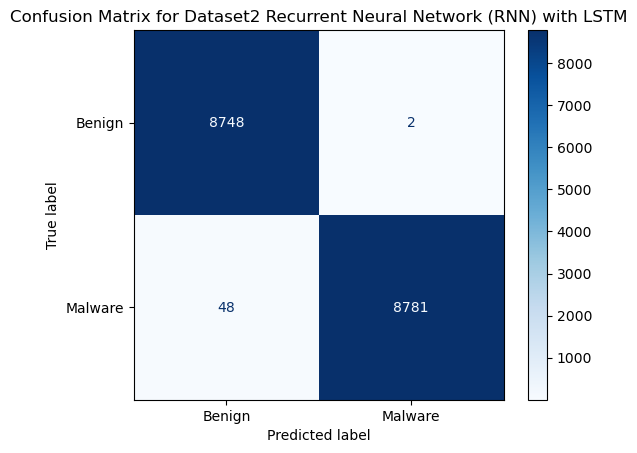

In [601]:
##RNN
#Generate the confusion matrix for dataset2
conf_matrix_for_dataset2 = confusion_matrix(y2_test, y2_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset2, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset2 Recurrent Neural Network (RNN) with LSTM")
plt.show()

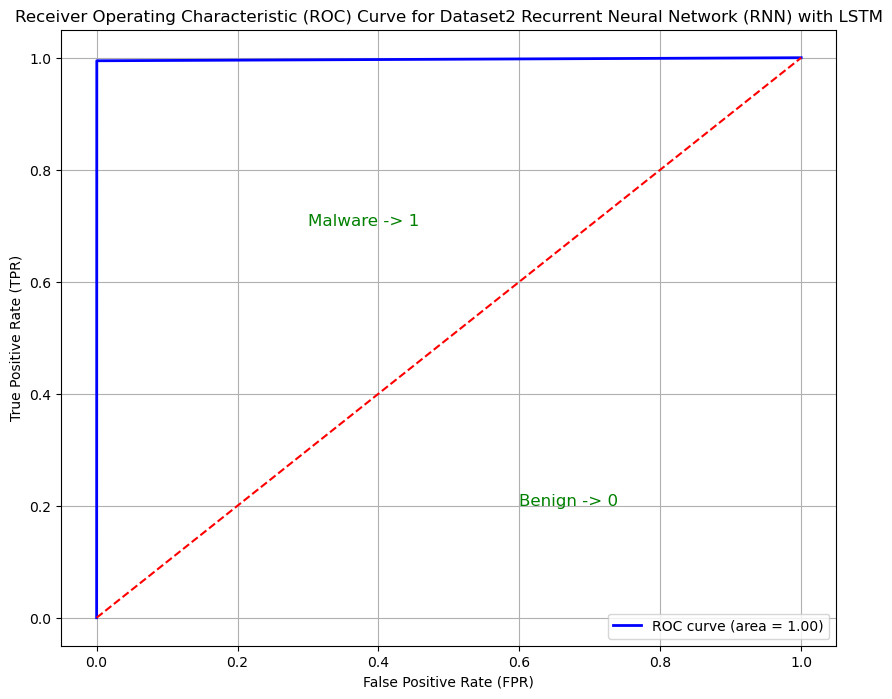

In [605]:
#ROC Curve for dataset2 for RNN
# Calculate the ROC curve
# Compute the ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred)  # y2_test are the true labels, y2_pred are the predicted probabilities

roc_auc = roc_auc_score(y2_test, y2_pred)
plt.figure(figsize=(10, 8))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line for reference (no-discrimination line)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset2 Recurrent Neural Network (RNN) with LSTM')
plt.legend(loc="lower right")

# Annotate the plot with the labels 'Benign' and 'Malware'
plt.text(0.6, 0.2, 'Benign -> 0', fontsize=12, color='green')
plt.text(0.3, 0.7, 'Malware -> 1', fontsize=12, color='green')

# Show the plot
plt.grid()
plt.show()

In [607]:
#Autoencoder for Anomaly Detection

In [609]:
#For Dataset1
from tensorflow.keras.models import Model, Sequential

y1_train = np.where(y1_train == 'Malware', 1, np.where(y1_train == 'Benign', 0, y1_train))
y1_test = np.where(y1_test == 'Malware', 1, np.where(y1_test == 'Benign', 0, y1_test))

# Filter x1_train to keep only benign samples
x1_train_benign = x1_train[y1_train == 0]

# Similarly, filter x1_test to keep only benign samples (for testing purposes)
x1_test_benign = x1_test[y1_test == 0]

# Similarly, filter x1_test only for malware samples (for testing purposes)
x1_test_malware = x1_test[y1_test == 1].astype(int)

# Reshaping x1_train for model
x1_train = x1_train.reshape(x1_train.shape[0], x1_train.shape[1],)

# Define the autoencoder architecture using Input layer
input_layer = Input(shape=(x1_train.shape[1],))  # Input layer with the same dimension as the input data
encoded = Dense(32, activation='relu')(input_layer)  # Encoded layer with fewer units (compression)
decoded = Dense(1, activation='sigmoid')(encoded)  # Decoded layer to reconstruct input, matches input_dim

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to verify architecture
autoencoder.summary()

autoencoder.fit(x1_train, y1_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the reconstruction error on both benign and malware data
reconstructions_benign = autoencoder.predict(x1_test_benign)
reconstructions_malware = autoencoder.predict(x1_test_malware)

mse_benign = np.mean(np.power(x1_test_benign - reconstructions_benign, 2), axis=1)
mse_malware = np.mean(np.power(x1_test_malware - reconstructions_malware, 2), axis=1)

# Set a threshold for the reconstruction error
threshold = np.percentile(mse_benign, 95)  # 95th percentile

# Predict classes based on reconstruction error
y1_pred_benign = (mse_benign > threshold).astype(int)
y1_pred_malware = (mse_malware > threshold).astype(int)

# Combine the predictions and true labels
y1_pred = np.concatenate([y1_pred_benign, y1_pred_malware])
y1_true = np.concatenate([np.zeros(len(y1_pred_benign)), np.ones(len(y1_pred_malware))])

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7666 - loss: 96.3972 - val_accuracy: 0.9873 - val_loss: 0.1324
Epoch 2/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9784 - loss: 0.2046 - val_accuracy: 0.9943 - val_loss: 0.0777
Epoch 3/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9862 - loss: 0.1314 - val_accuracy: 0.9868 - val_loss: 0.0781
Epoch 4/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9842 - loss: 0.1552 - val_accuracy: 0.9945 - val_loss: 0.1142
Epoch 5/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9858 - loss: 0.1826 - val_accuracy: 0.9959 - val_loss: 0.0626
Epoch 6/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9857 - loss: 0.1844 - val_accuracy: 0.9956 - val_loss: 0.0841
Epoch 7/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9905 - loss: 0.1396 - val_accuracy: 0.9677 - val_loss: 0.3050
Epoch 8/20
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.1708 -

In [611]:
#Accuracy, Precision, Recall, and F1 score for Dataset1 Autoencoder for Anomaly Detection
# Accuracy Score
test_accuracy_for_dataset1 = accuracy_score(y1_true, y1_pred)
print(f"Accuracy on Test Set for Dataset1: {test_accuracy_for_dataset1}")

# Precision Score
test_precision_for_dataset1 = precision_score(y1_true, y1_pred)
print(f"Precision on Test Set for Dataset1: {test_precision_for_dataset1}")

# Recall Score
test_recall_for_dataset1 = recall_score(y1_true, y1_pred)
print(f"Recall on Test Set for Dataset1: {test_recall_for_dataset1}")

# F1 Score
test_f1_for_dataset1 = f1_score(y1_true, y1_pred)
print(f"F1 Score on Test Set for Dataset1: {test_f1_for_dataset1}")

DL_Algorithm_for_Dataset1['Autoencoder']=[test_accuracy_for_dataset1, test_precision_for_dataset1, test_recall_for_dataset1, test_f1_for_dataset1]
print(DL_Algorithm_for_Dataset1.items())

Accuracy on Test Set for Dataset1: 0.5156143344709898
Precision on Test Set for Dataset1: 0.6518607442977191
Recall on Test Set for Dataset1: 0.09156829679595278
F1 Score on Test Set for Dataset1: 0.16057962442702942
dict_items([('MLP', [0.9963310580204778, 0.9951219512195122, 0.9976391231028667, 0.996378947368421]), ('RNN', [0.9993174061433447, 0.9989888776541962, 0.9996627318718381, 0.9993256911665542]), ('Autoencoder', [0.5156143344709898, 0.6518607442977191, 0.09156829679595278, 0.16057962442702942])])


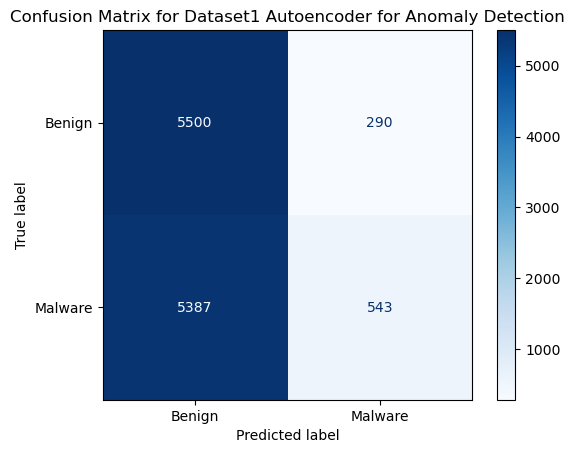

In [613]:
##Autoencoder for Anomaly Detection
#Generate the confusion matrix for dataset1
conf_matrix_for_dataset1 = confusion_matrix(y1_true, y1_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset1, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset1 Autoencoder for Anomaly Detection")
plt.show()

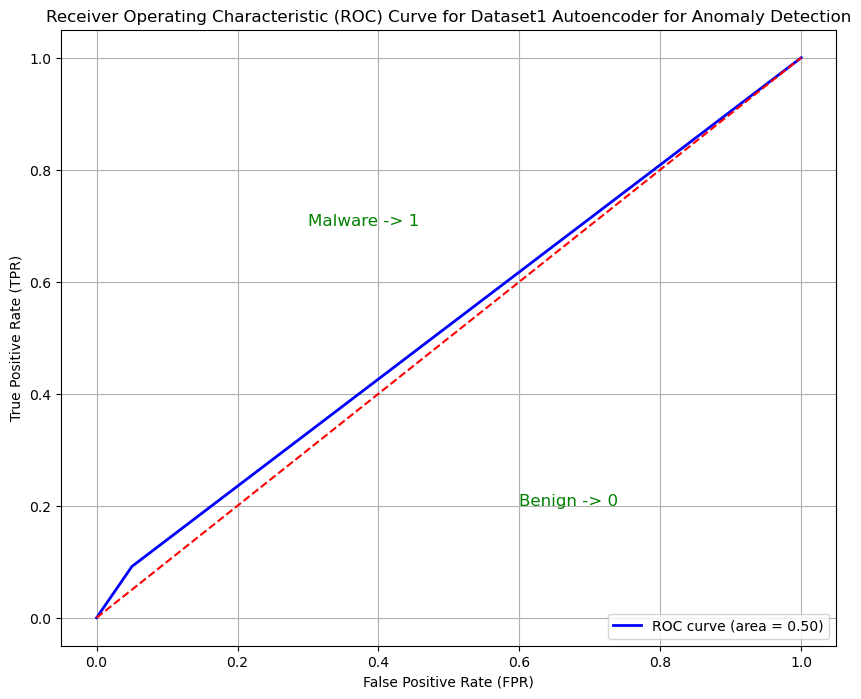

In [615]:
#ROC Curve for dataset1 for Autoencoder for Anomaly Detection
# Calculate the ROC curve
# Compute the ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y1_true, y1_pred)  # y1_test are the true labels, y1_pred are the predicted probabilities

roc_auc = roc_auc_score(y1_test, y1_pred)
plt.figure(figsize=(10, 8))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line for reference (no-discrimination line)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset1 Autoencoder for Anomaly Detection')
plt.legend(loc="lower right")

# Annotate the plot with the labels 'Benign' and 'Malware'
plt.text(0.6, 0.2, 'Benign -> 0', fontsize=12, color='green')
plt.text(0.3, 0.7, 'Malware -> 1', fontsize=12, color='green')

# Show the plot
plt.grid()
plt.show()

In [645]:
#Dataset2 for Autoencoder for Anomaly Detection
from tensorflow.keras.models import Model, Sequential

y2_train = np.where(y2_train == 'Malware', 1, np.where(y2_train == 'Benign', 0, y2_train))
y2_test = np.where(y2_test == 'Malware', 1, np.where(y2_test == 'Benign', 0, y2_test))

# Filter x1_train to keep only benign samples
x2_train_benign = x2_train[y2_train == 0]

# Similarly, filter x1_test to keep only benign samples (for testing purposes)
x2_test_benign = x2_test[y2_test == 0]

# Similarly, filter x1_test only for malware samples (for testing purposes)
x2_test_malware = x2_test[y2_test == 1].astype(int)

# Reshaping x1_train for model
x2_train = x2_train.reshape(x2_train.shape[0], x2_train.shape[1],)

# Define the autoencoder architecture using Input layer
input_layer = Input(shape=(x2_train.shape[1],))  # Input layer with the same dimension as the input data
encoded = Dense(32, activation='relu')(input_layer)  # Encoded layer with fewer units (compression)
decoded = Dense(1, activation='sigmoid')(encoded)  # Decoded layer to reconstruct input, matches input_dim

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to verify architecture
autoencoder.summary()

autoencoder.fit(x2_train, y2_train, epochs=20, batch_size=32, validation_split=0.3)

# Evaluate the reconstruction error on both benign and malware data
reconstructions_benign = autoencoder.predict(x2_test_benign)
reconstructions_malware = autoencoder.predict(x2_test_malware)

mse_benign = np.mean(np.power(x2_test_benign - reconstructions_benign, 2), axis=1)
mse_malware = np.mean(np.power(x2_test_malware - reconstructions_malware, 2), axis=1)

# Set a threshold for the reconstruction error
threshold = np.percentile(mse_benign, 95)  # 95th percentile

# Predict classes based on reconstruction error
y2_pred_benign = (mse_benign > threshold).astype(int)
y2_pred_malware = (mse_malware > threshold).astype(int)

# Combine the predictions and true labels
y2_pred = np.concatenate([y2_pred_benign, y2_pred_malware])
y2_true = np.concatenate([np.zeros(len(y2_pred_benign)), np.ones(len(y2_pred_malware))])

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8089 - loss: 27.3658 - val_accuracy: 0.9794 - val_loss: 0.5942
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9742 - loss: 0.3902 - val_accuracy: 0.9896 - val_loss: 0.2131
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9788 - loss: 0.3389 - val_accuracy: 0.9911 - val_loss: 0.1655
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9845 - loss: 0.1943 - val_accuracy: 0.9916 - val_loss: 0.1315
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9798 - loss: 0.2450 - val_accuracy: 0.9911 - val_loss: 0.1517
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9875 - loss: 0.2194 - val_accuracy: 0.9918 - val_loss: 0.1325
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9897 - loss: 0.1635 - val_accuracy: 0.9950 - val_loss: 0.1081
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9834 - loss: 0.2368 - val_accuracy: 0

In [647]:
#Accuracy, Precision, Recall, and F1 score for Dataset1 Autoencoder for Anomaly Detection
# Accuracy Score
#Dataset2
test_accuracy_for_dataset2 = accuracy_score(y2_true, y2_pred)
print(f"Accuracy on Test Set for Dataset2: {test_accuracy_for_dataset2}")

# Precision Score
test_precision_for_dataset2 = precision_score(y2_true, y2_pred)
print(f"Precision on Test Set for Dataset2: {test_precision_for_dataset2}")

# Recall Score
test_recall_for_dataset2 = recall_score(y2_true, y2_pred)
print(f"Recall on Test Set for Dataset2: {test_recall_for_dataset2}")

# F1 Score
test_f1_for_dataset2 = f1_score(y2_true, y2_pred)
print(f"F1 Score on Test Set for Dataset2: {test_f1_for_dataset2}")

DL_Algorithm_for_Dataset2['Autoencoder']=[test_accuracy_for_dataset2, test_precision_for_dataset2, test_recall_for_dataset2, test_f1_for_dataset2]
print(DL_Algorithm_for_Dataset2.items())

Accuracy on Test Set for Dataset2: 0.5191421582570112
Precision on Test Set for Dataset2: 0.6501597444089456
Recall on Test Set for Dataset2: 0.09219617170687507
F1 Score on Test Set for Dataset2: 0.16149191548457495
dict_items([('MLP', [0.995733545707947, 0.993906567366283, 0.9976214746856948, 0.9957605562150246]), ('RNN', [0.9971556971386313, 0.9997722873733349, 0.9945633707101597, 0.9971610265727913]), ('Autoencoder', [0.5191421582570112, 0.6501597444089456, 0.09219617170687507, 0.16149191548457495])])


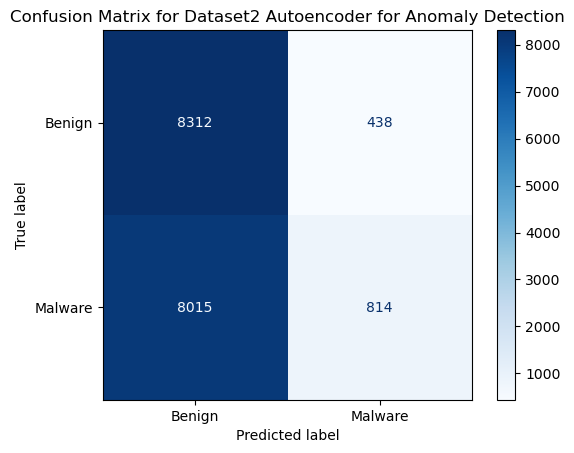

In [653]:
##Autoencoder for Anomaly Detection
#Generate the confusion matrix for dataset2
conf_matrix_for_dataset2 = confusion_matrix(y2_true, y2_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_for_dataset2, display_labels=['Benign', 'Malware'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Dataset2 Autoencoder for Anomaly Detection")
plt.show()

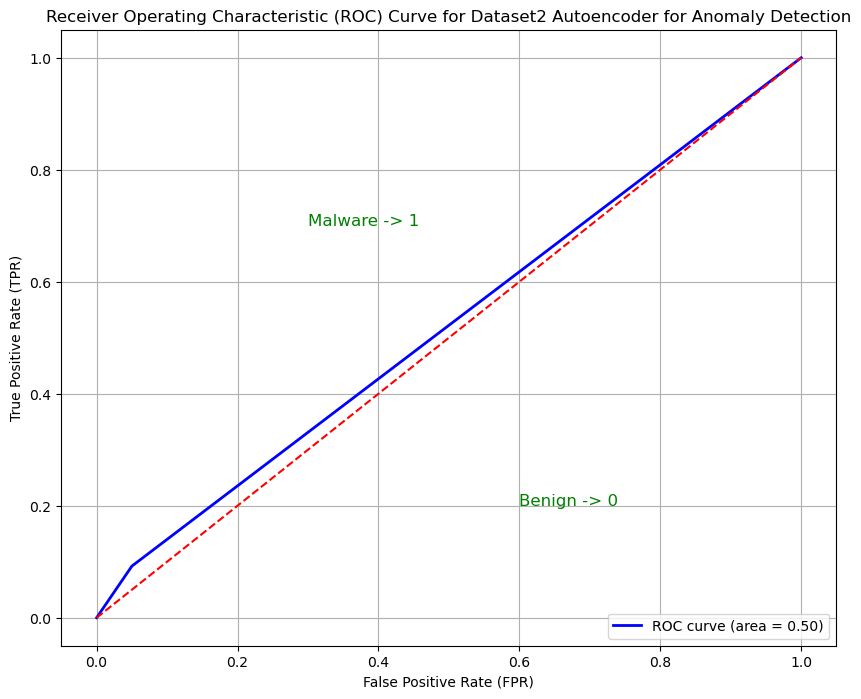

In [655]:
#ROC Curve for dataset2 for Autoencoder for Anomaly Detection
# Calculate the ROC curve
# Compute the ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y2_true, y2_pred)  # y2_test are the true labels, y2_pred are the predicted probabilities

roc_auc = roc_auc_score(y2_test, y2_pred)
plt.figure(figsize=(10, 8))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line for reference (no-discrimination line)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dataset2 Autoencoder for Anomaly Detection')
plt.legend(loc="lower right")

# Annotate the plot with the labels 'Benign' and 'Malware'
plt.text(0.6, 0.2, 'Benign -> 0', fontsize=12, color='green')
plt.text(0.3, 0.7, 'Malware -> 1', fontsize=12, color='green')

# Show the plot
plt.grid()
plt.show()

In [623]:
#Compare the machine learning and deep learning
#To start comparison between Machine learning and deep Learning
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load the Deep learning results to Dataframe
#Dataset1 Results
df1 = pd.DataFrame(DL_Algorithm_for_Dataset1)
df1.head()

,MLP,RNN,Autoencoder
0,0.996331,0.999317,0.515614
1,0.995122,0.998989,0.651861
2,0.997639,0.999663,0.091568
3,0.996379,0.999326,0.160580


In [625]:
df1.index = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
df1.head()

,MLP,RNN,Autoencoder
Accuracy Score,0.996331,0.999317,0.515614
Precision Score,0.995122,0.998989,0.651861
Recall Score,0.997639,0.999663,0.091568
F1 Score,0.996379,0.999326,0.160580


In [628]:
#Dataset2 Results
df2 = pd.DataFrame(DL_Algorithm_for_Dataset2)
df2.head()

,MLP,RNN,Autoencoder
0,0.995734,0.997156,0.519142
1,0.993907,0.999772,0.650160
2,0.997621,0.994563,0.092196
3,0.995761,0.997161,0.161492


In [630]:
df2.index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
df2.head()

,MLP,RNN,Autoencoder
Accuracy Score,0.995734,0.997156,0.519142
Precision Score,0.993907,0.999772,0.650160
Recall Score,0.997621,0.994563,0.092196
F1 Score,0.995761,0.997161,0.161492


In [632]:
#merge the dataframe of the Dataset1 and Dataset2 results
df_combined_DL = pd.merge(df1, df2, left_index=True, right_index=True, suffixes=('_Dataset1', '_Dataset2'))
df_combined_DL.head()

,MLP_Dataset1,RNN_Dataset1,Autoencoder_Dataset1,MLP_Dataset2,RNN_Dataset2,Autoencoder_Dataset2
Accuracy Score,0.996331,0.999317,0.515614,0.995734,0.997156,0.519142
Precision Score,0.995122,0.998989,0.651861,0.993907,0.999772,0.650160
Recall Score,0.997639,0.999663,0.091568,0.997621,0.994563,0.092196
F1 Score,0.996379,0.999326,0.160580,0.995761,0.997161,0.161492


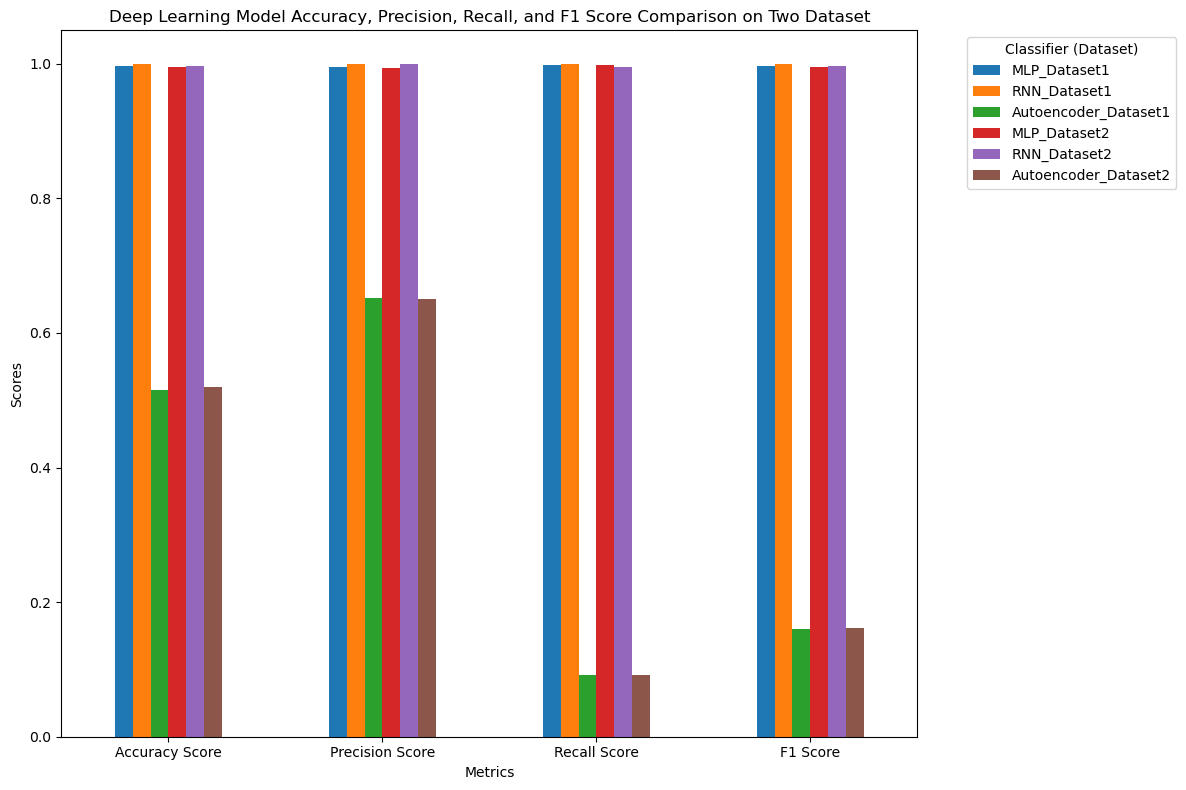

In [634]:
# Plotting the comparison of Dataset 1 and Dataset2 for Deep Learning using a grouped bar chart
df_combined_DL.plot(kind='bar', figsize=(12, 8))
plt.title('Deep Learning Model Accuracy, Precision, Recall, and F1 Score Comparison on Two Dataset')
plt.ylabel('Scores')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Classifier (Dataset)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

In [637]:
#Comparing Deep Learning and Machine Learning

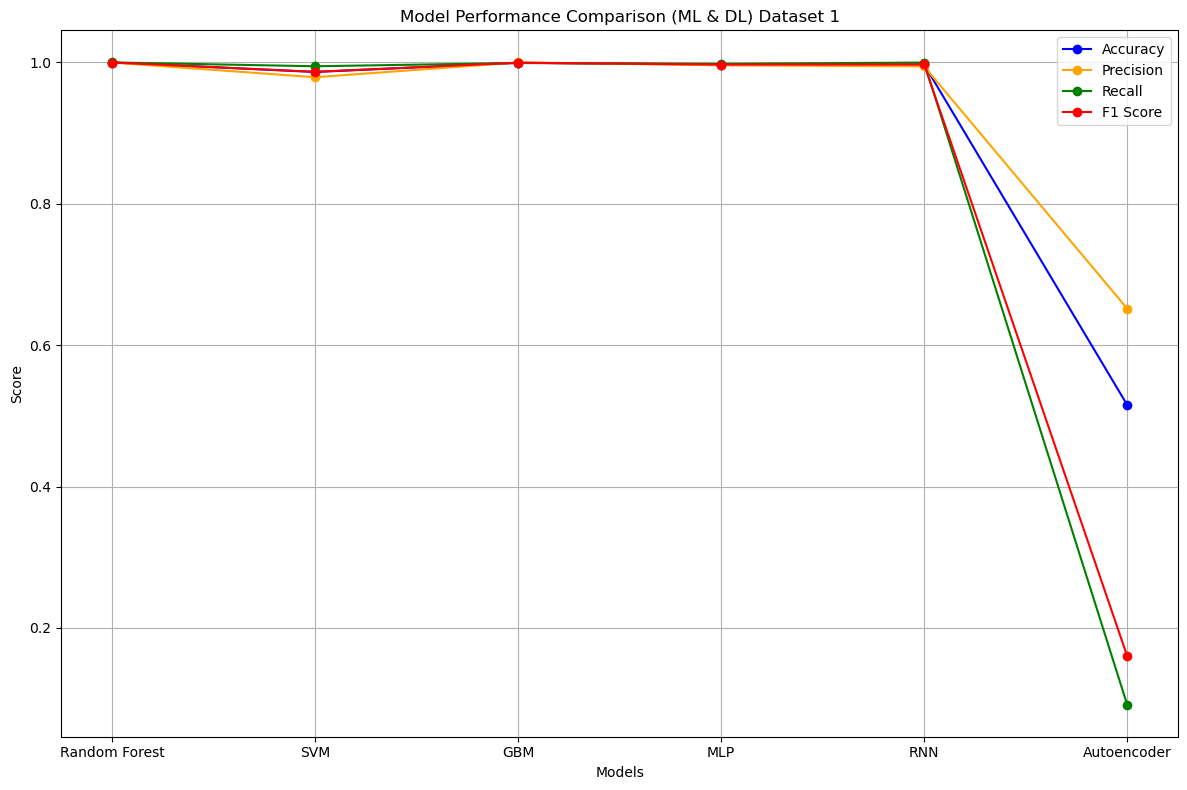

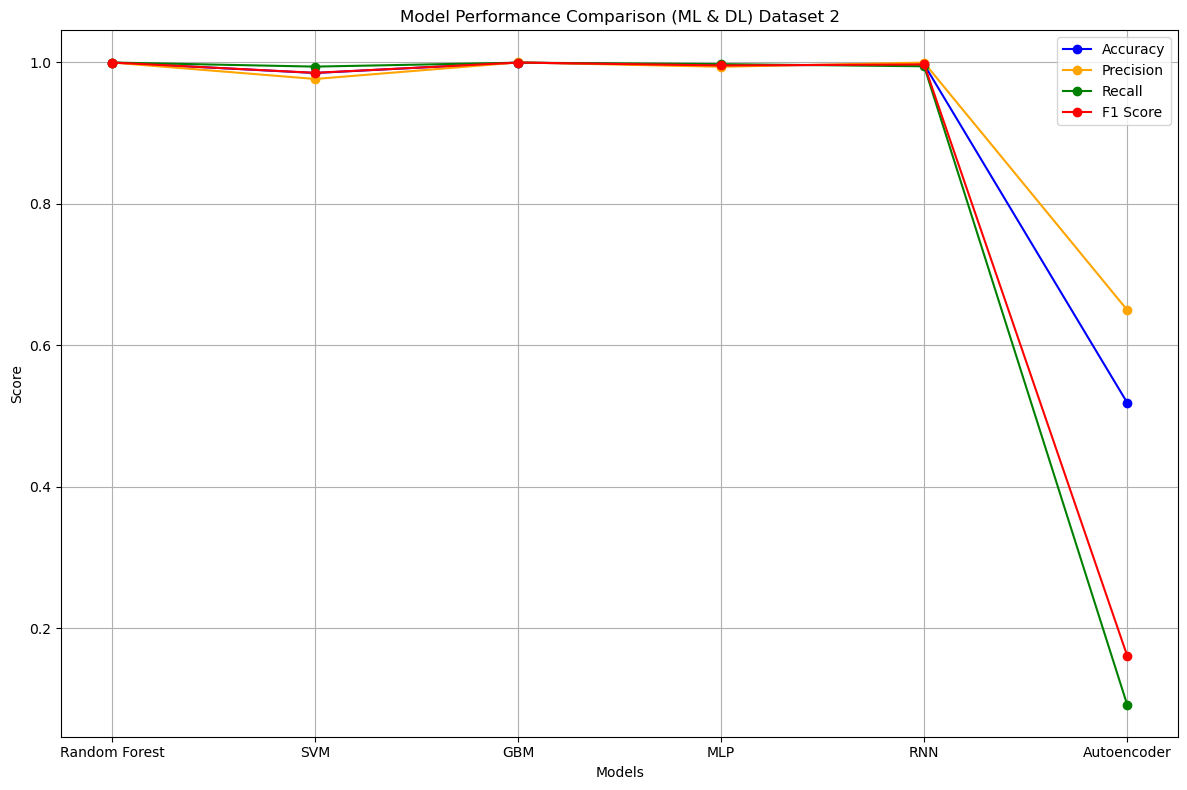

In [639]:
import pandas as pd
import matplotlib.pyplot as plt

index = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
#Dataset1
df1_ml = pd.DataFrame(ML_Algorithm_for_Dataset1, index=index)
df1_dl = pd.DataFrame(DL_Algorithm_for_Dataset1, index=index)

# Convert DataFrame to dictionary with filtering
metrics_ml1 = {
    'Accuracy': df1_ml.loc['Accuracy Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'Precision': df1_ml.loc['Precision Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'Recall': df1_ml.loc['Recall Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'F1 Score': df1_ml.loc['F1 Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist()
}

metrics_dl1 = {
    'Accuracy': df1_dl.loc['Accuracy Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'Precision': df1_dl.loc['Precision Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'Recall': df1_dl.loc['Recall Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'F1 Score': df1_dl.loc['F1 Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist()
}

#Models list matching the order in your dictionaries
models = ['Random Forest', 'SVM', 'GBM', 'MLP', 'RNN', 'Autoencoder']

# Combine the metrics for plotting
combined_metrics = {
    'Accuracy': metrics_ml['Accuracy'] + metrics_dl['Accuracy'],
    'Precision': metrics_ml['Precision'] + metrics_dl['Precision'],
    'Recall': metrics_ml['Recall'] + metrics_dl['Recall'],
    'F1 Score': metrics_ml['F1 Score'] + metrics_dl['F1 Score']
}

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))

# Plot lines for each metric
colors = ['blue', 'orange', 'green', 'red']
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score']):
    y_values = combined_metrics[metric]
    ax.plot(models, y_values, marker='o', color=colors[i], linestyle='-', label=metric)

# Customizing the plot
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (ML & DL) Dataset 1')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

#Dataset2
index = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
df2_ml = pd.DataFrame(ML_Algorithm_for_Dataset2, index=index)
df2_dl = pd.DataFrame(DL_Algorithm_for_Dataset2, index=index)

metrics_ml2 = {
    'Accuracy': df2_ml.loc['Accuracy Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'Precision': df2_ml.loc['Precision Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'Recall': df2_ml.loc['Recall Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'F1 Score': df2_ml.loc['F1 Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist()
}

metrics_dl2 = {
    'Accuracy': df2_dl.loc['Accuracy Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'Precision': df2_dl.loc['Precision Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'Recall': df2_dl.loc['Recall Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist(),
    'F1 Score': df2_dl.loc['F1 Score'].apply(pd.to_numeric, errors='coerce').dropna().tolist()
}

#Models list matching the order in your dictionaries
models = ['Random Forest', 'SVM', 'GBM', 'MLP', 'RNN', 'Autoencoder']

# Combine the metrics for plotting
combined_metrics2 = {
    'Accuracy': metrics_ml2['Accuracy'] + metrics_dl2['Accuracy'],
    'Precision': metrics_ml2['Precision'] + metrics_dl2['Precision'],
    'Recall': metrics_ml2['Recall'] + metrics_dl2['Recall'],
    'F1 Score': metrics_ml2['F1 Score'] + metrics_dl2['F1 Score']
}

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))

# Plot lines for each metric
colors = ['blue', 'orange', 'green', 'red']
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score']):
    y2_values = combined_metrics2[metric]
    ax.plot(models, y2_values, marker='o', color=colors[i], linestyle='-', label=metric)

# Customizing the plot
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (ML & DL) Dataset 2')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()